In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import pickle
import csv
import seaborn as sns
from operator import itemgetter

In [2]:
with open('Year_Wise Network/NodesTable.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]

In [3]:
len(nodes)

1000

In [4]:
node_names = [n[0] for n in nodes] # Get a list of only the node names

In [5]:
with open('Year_Wise Network/2010.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edges=[]
    count=0
    for e in edgereader:
        if count==0:
            count+=1
            continue
        if int(e[2])>0:
            edges.append((e[0],e[1],{'weight':abs(int(e[2]))}))
        else:
            edges.append((e[1],e[0],{'weight':abs(int(e[2]))}))

In [6]:
G=nx.DiGraph()

In [7]:
G.add_nodes_from(node_names)
G.add_edges_from(edges)

KeyboardInterrupt: 

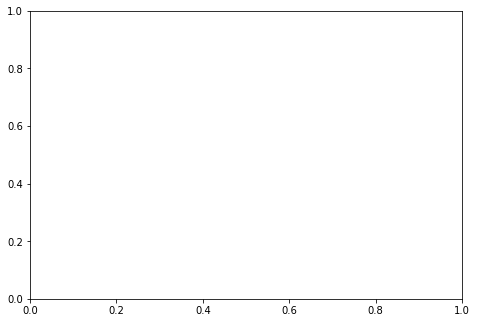

In [8]:
nx.draw(G)

In [43]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 1000
Number of edges: 8801
Average in degree:   8.8010
Average out degree:   8.8010


In [44]:
degree_dict = dict(G.degree(G.nodes()))

In [46]:
degree_dict['Magnus Carlsen']

57

In [4]:
networks=[]

with open('Year_Wise Network/NodesTable.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]
node_names = [n[0] for n in nodes] # Get a list of only the node names
gender={}
rating = {}
title = {}
nationality = {}
games = {}
rank = {}
fide_id={}    
year_of_birth={}
for node in nodes: # Loop through the list, one row at a time
    gender[node[0]]=node[1]
    rating[node[0]] = node[2]
    title[node[0]] = node[3]
    nationality[node[0]] = node[4]
    games[node[0]] = node[5]
    rank[node[0]] = node[6]
    fide_id[node[0]] = node[7]
    year_of_birth[node[0]]=node[8]
for year in range(2010,2022):
    with open('Corrected Year_Wise Network/{}.csv'.format(year), 'r') as edgecsv: # Open the file
        edgereader = csv.reader(edgecsv) # Read the csv
        edges=[]
        count=0
        for e in edgereader:
            if count==0:
                count+=1
                continue
            
            edges.append((e[0],e[1],{'weight':abs(int(e[2])),'matches':int(e[3]),'adjusted':abs(int(e[2]))/int(e[3])}))
            
    G=nx.DiGraph()
    G.add_nodes_from(node_names)
    G.add_edges_from(edges)
    nx.set_node_attributes(G, gender, 'gender')
    nx.set_node_attributes(G, rating, 'rating')
    nx.set_node_attributes(G, title, 'title')
    nx.set_node_attributes(G, nationality, 'nationality')
    nx.set_node_attributes(G, games, 'games')
    nx.set_node_attributes(G, rank, 'rank')
    nx.set_node_attributes(G, fide_id, 'fide_id')
    nx.set_node_attributes(G, year_of_birth, 'year_of_birth')
    networks.append(G)

In [5]:
with open("NetwokxGraphs.pickle","wb") as fp:
    pickle.dump(networks,fp)

In [2]:
with open("NetwokxGraphs.pickle","rb") as fp:
    networks=pickle.load(fp)

In [6]:

deg_centrality = nx.degree_centrality(networks[0])
  
# G is the Karate Club Graph
print(deg_centrality)

{'Magnus Carlsen': 0.057057057057057055, 'Fabiano Caruana': 0.1061061061061061, 'Liren Ding': 0.026026026026026026, 'Ian Nepomniachtchi': 0.08308308308308308, 'Levon Aronian': 0.05305305305305305, 'Alexander Grischuk': 0.06906906906906907, 'Anish Giri': 0.0990990990990991, 'Shakhriyar Mamedyarov': 0.06106106106106106, 'Wesley So': 0.07607607607607608, 'Teimour Radjabov': 0.05305305305305305, 'Hao Wang': 0.05405405405405406, 'Richard Rapport': 0.04204204204204204, 'Alireza Firouzja': 0.0, 'Leinier Dominguez Perez': 0.04504504504504504, 'Maxime Vachier Lagrave': 0.1041041041041041, 'Sergey Karjakin': 0.07607607607607608, 'Viswanathan Anand': 0.03403403403403403, 'Vladimir Kramnik': 0.056056056056056056, 'Hikaru Nakamura': 0.07407407407407407, 'Veselin Topalov': 0.02002002002002002, 'Yi Wei': 0.01001001001001001, 'Pentala Harikrishna': 0.06806806806806806, 'Jan Krzysztof Duda': 0.009009009009009009, 'Santosh Gujrathi Vidit': 0.013013013013013013, 'Dmitry Andreikin': 0.06406406406406406, '

In [4]:
sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)

In [5]:
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree:
('Fabiano Caruana', 0.1061061061061061)
('Arkadij Naiditsch', 0.10510510510510511)
('Maxime Vachier Lagrave', 0.1041041041041041)
('Anish Giri', 0.0990990990990991)
('Sergei Movsesian', 0.0990990990990991)


In [6]:

deg_centrality = nx.degree_centrality(networks[1])
  
# G is the Karate Club Graph
print(deg_centrality)

{'Magnus Carlsen': 0.06106106106106106, 'Fabiano Caruana': 0.15215215215215216, 'Liren Ding': 0.04504504504504504, 'Ian Nepomniachtchi': 0.13813813813813813, 'Levon Aronian': 0.07607607607607608, 'Alexander Grischuk': 0.1011011011011011, 'Anish Giri': 0.14614614614614616, 'Shakhriyar Mamedyarov': 0.1031031031031031, 'Wesley So': 0.12112112112112113, 'Teimour Radjabov': 0.06606606606606606, 'Hao Wang': 0.0890890890890891, 'Richard Rapport': 0.07807807807807808, 'Alireza Firouzja': 0.0, 'Leinier Dominguez Perez': 0.07307307307307308, 'Maxime Vachier Lagrave': 0.16216216216216217, 'Sergey Karjakin': 0.1011011011011011, 'Viswanathan Anand': 0.05305305305305305, 'Vladimir Kramnik': 0.06506506506506507, 'Hikaru Nakamura': 0.08108108108108109, 'Veselin Topalov': 0.035035035035035036, 'Yi Wei': 0.018018018018018018, 'Pentala Harikrishna': 0.12312312312312312, 'Jan Krzysztof Duda': 0.02102102102102102, 'Santosh Gujrathi Vidit': 0.02102102102102102, 'Dmitry Andreikin': 0.11711711711711711, 'Mich

In [7]:
sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)

In [8]:
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree:
('Arkadij Naiditsch', 0.19019019019019018)
('Boris Grachev', 0.17417417417417416)
('Sergei Movsesian', 0.16716716716716717)
('Maxime Vachier Lagrave', 0.16216216216216217)
('Radoslaw Wojtaszek', 0.15615615615615616)


In [30]:

deg_centrality = nx.degree_centrality(networks[0])
  
sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)
deg_centrality = nx.out_degree_centrality(networks[0])
  
sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by out-degree:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree:
('Fabiano Caruana', 0.1061061061061061)
('Arkadij Naiditsch', 0.10510510510510511)
('Maxime Vachier Lagrave', 0.1041041041041041)
('Anish Giri', 0.0990990990990991)
('Sergei Movsesian', 0.0990990990990991)
Top 5 nodes by out-degree:
('Sergei Movsesian', 0.057057057057057055)
('Vladimir Potkin', 0.05305305305305305)
('Victor Bologan', 0.05305305305305305)
('Maxime Vachier Lagrave', 0.05205205205205205)
('Zahar Efimenko', 0.05205205205205205)


In [31]:

deg_centrality = nx.degree_centrality(networks[1])
  
sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)
deg_centrality = nx.out_degree_centrality(networks[1])
  
sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by out-degree:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree:
('Arkadij Naiditsch', 0.19019019019019018)
('Boris Grachev', 0.17417417417417416)
('Sergei Movsesian', 0.16716716716716717)
('Maxime Vachier Lagrave', 0.16216216216216217)
('Radoslaw Wojtaszek', 0.15615615615615616)
Top 5 nodes by out-degree:
('Victor Bologan', 0.1011011011011011)
('Zahar Efimenko', 0.0990990990990991)
('Sergei Movsesian', 0.0980980980980981)
('Radoslaw Wojtaszek', 0.0890890890890891)
('Maxime Vachier Lagrave', 0.08208208208208208)


In [32]:

deg_centrality = nx.degree_centrality(networks[2])
  
sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)
deg_centrality = nx.out_degree_centrality(networks[2])
  
sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by out-degree:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree:
('Boris Grachev', 0.2502502502502503)
('Arkadij Naiditsch', 0.22922922922922923)
('Maxime Vachier Lagrave', 0.21021021021021022)
('Sergei Movsesian', 0.2072072072072072)
('Zahar Efimenko', 0.2062062062062062)
Top 5 nodes by out-degree:
('Zahar Efimenko', 0.13613613613613612)
('Victor Bologan', 0.12912912912912913)
('Sergei Movsesian', 0.12112112112112113)
('Vladimir Potkin', 0.11211211211211211)
('Radoslaw Wojtaszek', 0.11011011011011011)


In [33]:

deg_centrality = nx.degree_centrality(networks[3])
  
sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)
deg_centrality = nx.out_degree_centrality(networks[3])
  
sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by out-degree:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree:
('Boris Grachev', 0.28428428428428426)
('Arkadij Naiditsch', 0.2732732732732733)
('Zahar Efimenko', 0.26126126126126126)
('Sergei Movsesian', 0.2502502502502503)
('Etienne Bacrot', 0.24124124124124124)
Top 5 nodes by out-degree:
('Zahar Efimenko', 0.16816816816816815)
('Sergei Movsesian', 0.14914914914914915)
('Victor Bologan', 0.14514514514514515)
('Vladimir Potkin', 0.14314314314314314)
('Rauf Mamedov', 0.13813813813813813)


In [34]:

deg_centrality = nx.degree_centrality(networks[4])
  
sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)
deg_centrality = nx.out_degree_centrality(networks[4])
  
sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by out-degree:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree:
('Boris Grachev', 0.31431431431431434)
('Arkadij Naiditsch', 0.3103103103103103)
('Zahar Efimenko', 0.3053053053053053)
('Daniel Fridman', 0.2982982982982983)
('Radoslaw Wojtaszek', 0.28928928928928926)
Top 5 nodes by out-degree:
('Zahar Efimenko', 0.20020020020020018)
('Radoslaw Wojtaszek', 0.17617617617617617)
('Victor Bologan', 0.17617617617617617)
('Vladimir Potkin', 0.17517517517517517)
('Sergei Movsesian', 0.17217217217217218)


In [12]:

deg_centrality = nx.degree_centrality(networks[5])
  
sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree:
('Mateusz Bartel', 0.34934934934934936)
('Boris Grachev', 0.34634634634634637)
('Etienne Bacrot', 0.3383383383383383)
('Arkadij Naiditsch', 0.33733733733733734)
('Daniel Fridman', 0.33733733733733734)


In [13]:

deg_centrality = nx.degree_centrality(networks[6])
  
sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree:
('Arkadij Naiditsch', 0.39039039039039036)
('Mateusz Bartel', 0.39039039039039036)
('Boris Grachev', 0.3763763763763764)
('Aleksey Dreev', 0.37037037037037035)
('Francisco Vallejo Pons', 0.36336336336336333)


In [14]:

deg_centrality = nx.degree_centrality(networks[7])
  
sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree:
('Arkadij Naiditsch', 0.44144144144144143)
('Mateusz Bartel', 0.4144144144144144)
('Evgeny Postny', 0.4014014014014014)
('Romain Edouard', 0.3993993993993994)
('Rauf Mamedov', 0.39539539539539537)


In [15]:

deg_centrality = nx.degree_centrality(networks[8])
  
sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree:
('Arkadij Naiditsch', 0.4694694694694695)
('Sergei Zhigalko', 0.44844844844844844)
('Evgeny Postny', 0.44644644644644643)
('Rauf Mamedov', 0.44344344344344344)
('Daniel Fridman', 0.44244244244244246)


In [16]:

deg_centrality = nx.degree_centrality(networks[9])
  
sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree:
('Evgeny Postny', 0.5115115115115115)
('Arkadij Naiditsch', 0.5005005005005005)
('Aleksey Dreev', 0.4894894894894895)
('Daniel Fridman', 0.4854854854854855)
('Romain Edouard', 0.48148148148148145)


In [17]:

deg_centrality = nx.degree_centrality(networks[10])
  
sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree:
('Evgeny Postny', 0.5205205205205206)
('Arkadij Naiditsch', 0.5035035035035035)
('Daniel Fridman', 0.5005005005005005)
('Anton Korobov', 0.4934934934934935)
('Aleksey Dreev', 0.4894894894894895)


In [20]:

deg_centrality = nx.degree_centrality(networks[11])
  
sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
print("Top 5 nodes by degree:")
for d in sorted_degree[:5]:
    print(d)

Top 5 nodes by degree:
('Evgeny Postny', 0.5215215215215215)
('Arkadij Naiditsch', 0.5035035035035035)
('Daniel Fridman', 0.5025025025025025)
('Anton Korobov', 0.4934934934934935)
('Aleksey Dreev', 0.4894894894894895)


# Helper Functions

In [4]:
def filter_edges(G):
    H=nx.DiGraph()
    H.add_nodes_from(G.nodes(data=True))
    H.add_edges_from(((u, v, e) for u,v,e in G.edges(data=True) if e['weight'] > 0 and (u!=v)))
    return H

In [5]:
H = filter_edges(networks[11])
len(H.edges())

37034

# Degree Distribution

In [12]:
def degree_histogram_directed(G, in_degree=False, out_degree=False):
    """Return a list of the frequency of each degree value.

    Parameters
    ----------
    G : Networkx graph
       A graph
    in_degree : bool
    out_degree : bool

    Returns
    -------
    hist : list
       A list of frequencies of degrees.
       The degree values are the index in the list.

    Notes
    -----
    Note: the bins are width one, hence len(list) can be large
    (Order(number_of_edges))
    """
    nodes = G.nodes()
    if in_degree:
        in_degree = dict(G.in_degree())
        degseq=[in_degree.get(k,0) for k in nodes]
    elif out_degree:
        out_degree = dict(G.out_degree())
        degseq=[out_degree.get(k,0) for k in nodes]
    else:
        degseq=[v for k, v in G.degree()]
    dmax=max(degseq)+1
    freq= [ 0 for d in range(dmax) ]
    for d in degseq:
        freq[d] += 1
    return freq

In [13]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

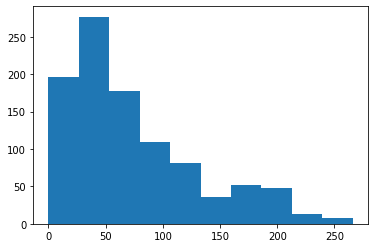

In [14]:
plot_degree_dist(networks[11])

In [15]:
def in_out(G):
    in_degree_freq = degree_histogram_directed(G, in_degree=True)
    out_degree_freq = degree_histogram_directed(G, out_degree=True)
    degrees = range(len(in_degree_freq))
    plt.figure(figsize=(12, 8)) 
    plt.loglog(range(len(in_degree_freq)), in_degree_freq, 'go-', label='in-degree') 
    plt.loglog(range(len(out_degree_freq)), out_degree_freq, 'bo-', label='out-degree')
    plt.xlabel('Degree')
    plt.ylabel('Frequency')

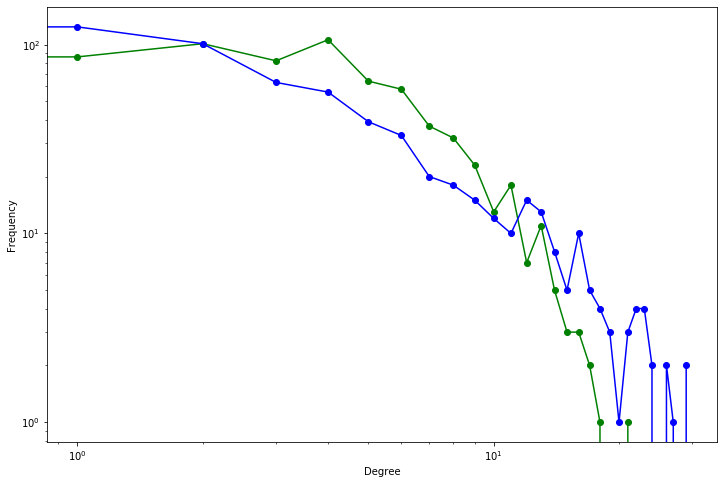

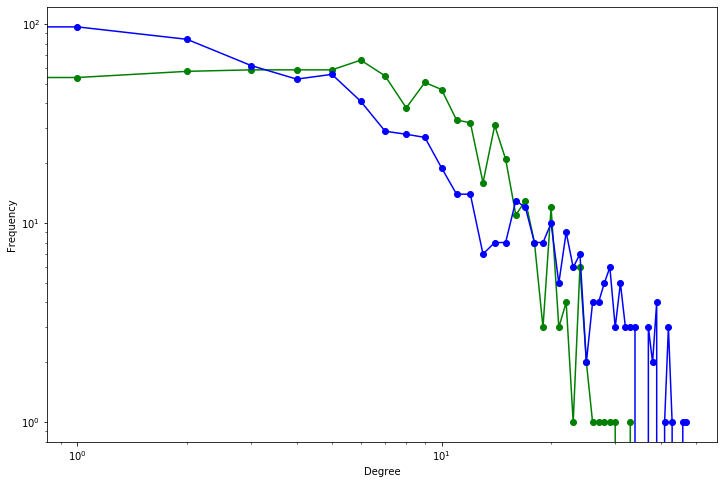

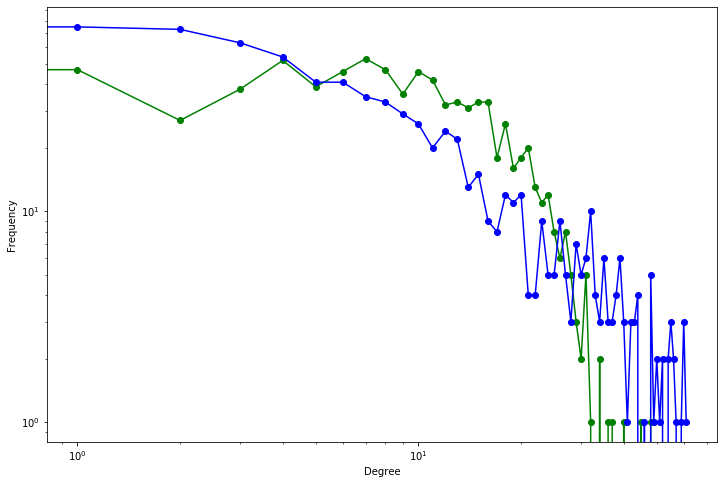

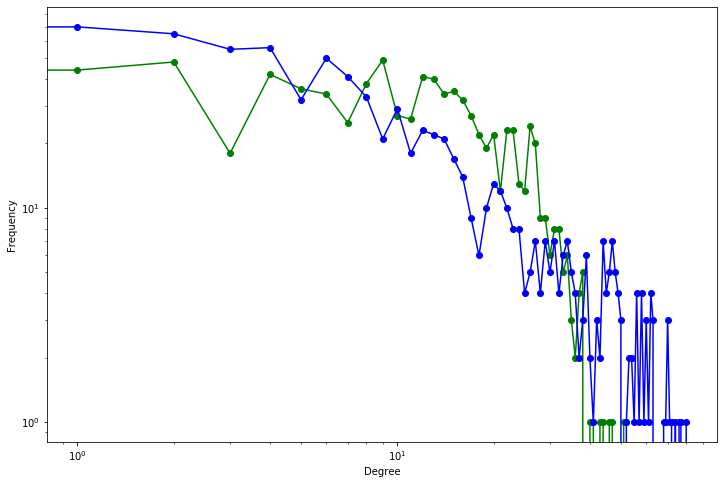

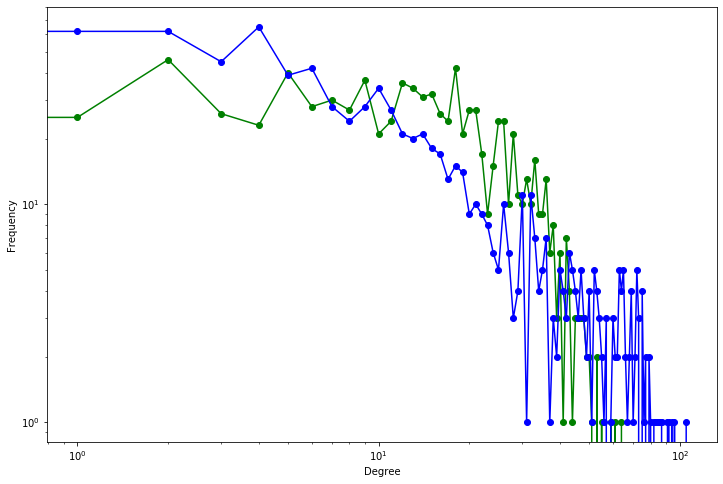

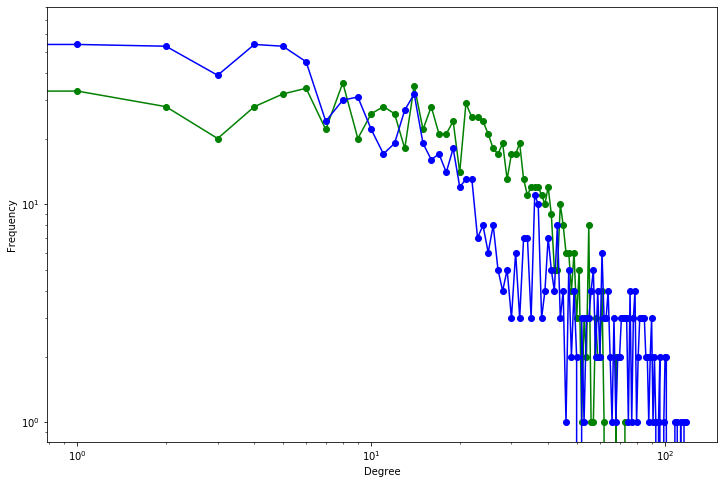

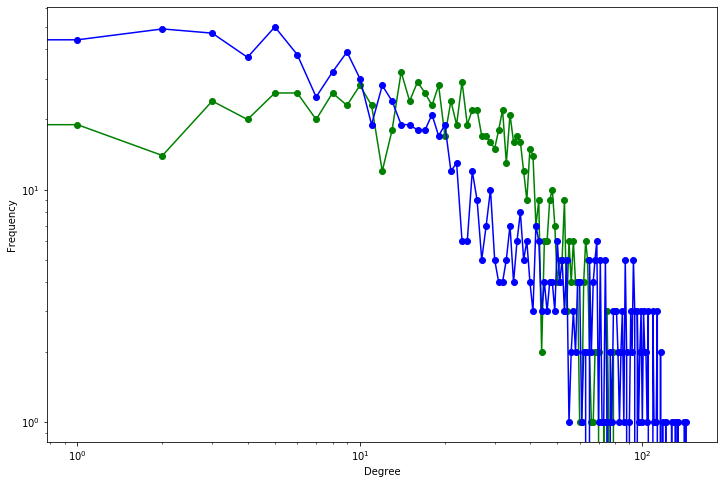

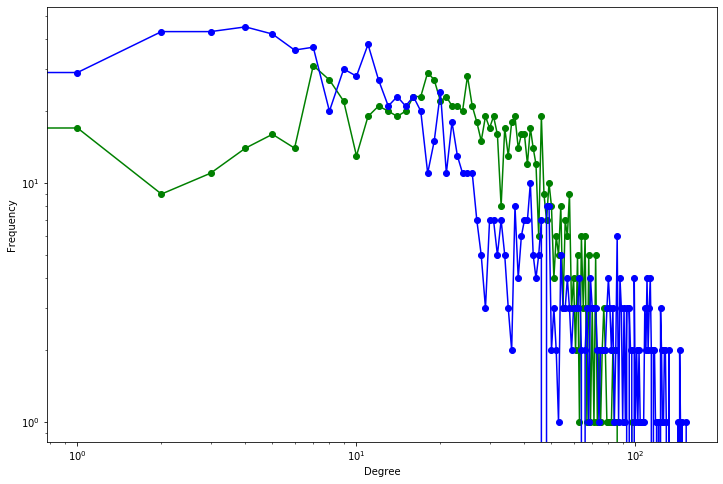

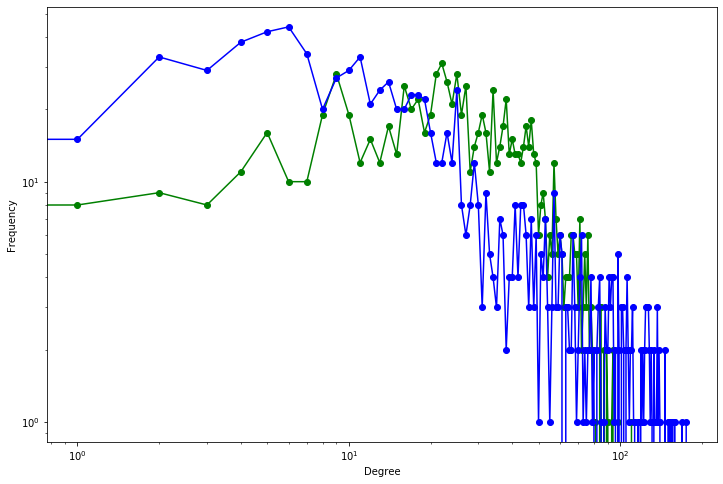

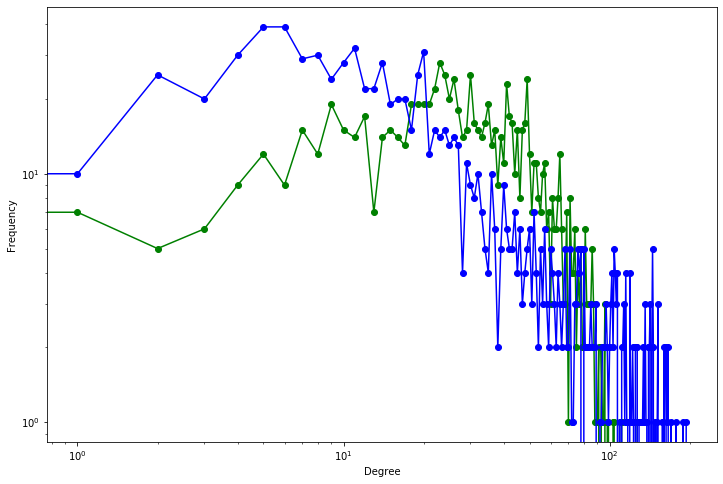

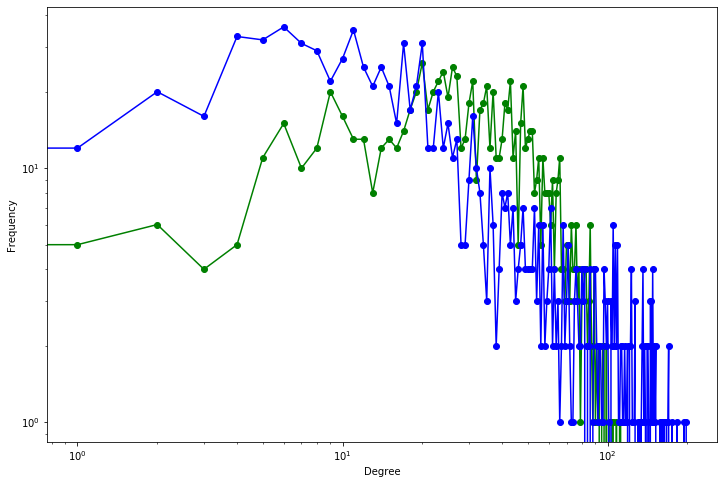

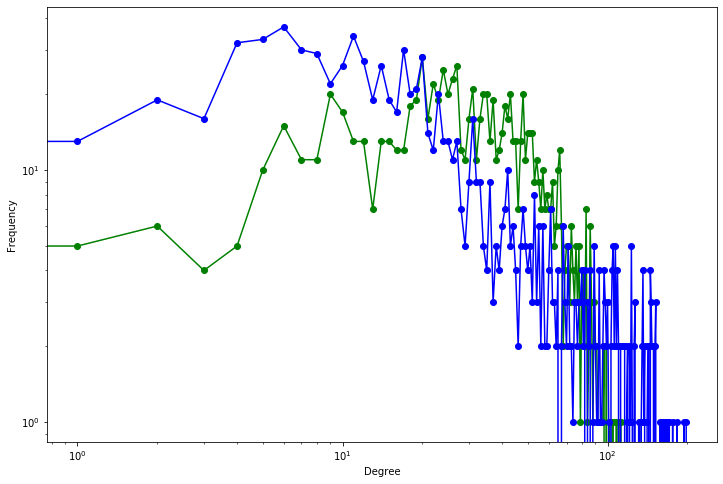

In [16]:
for i in range(0,12):
    in_out(filter_edges(networks[i]))

In [9]:
G=filter_edges(networks[11])
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) # used for degree distribution and powerlaw test
out_degree_sequence= sorted([d for n, d in G.out_degree()], reverse=True)
in_degree_sequence= sorted([d for n, d in G.in_degree()], reverse=True)

In [10]:
import powerlaw
fit = powerlaw.Fit(degree_sequence, xmin=1)
fit1 = powerlaw.Fit(out_degree_sequence, xmin=1)
fit2 = powerlaw.Fit(in_degree_sequence, xmin=1)

Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


In [11]:
print(fit.power_law.alpha)
print(fit1.power_law.alpha)
fit2.power_law.alpha

1.2516917036162802
1.32654739987747


1.2950189645939827

# Centrality Measures

# Degree Centrality

In [10]:
for i in range(0,12):
    G=filter_edges(networks[i])
    deg_centrality={}
    for node in G.nodes():
        deg_centrality[node]=G.degree(node)
    # deg_centrality = nx.degree_centrality(filter_edges(networks[i]))

    sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
    print("Top 5 nodes by degree:")
    for d in sorted_degree[:5]:
        print(d,G.nodes[d[0]]['rating'])
    G=filter_edges(networks[i])
    deg_centrality={}
    for node in G.nodes():
        deg_centrality[node]=G.out_degree(node)
    # deg_centrality = nx.out_degree_centrality(filter_edges(networks[i]))

    sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
    print("Top 5 nodes by out-degree:")
    for d in sorted_degree[:5]:
        print(d,G.nodes[d[0]]['rating'])
    print('')

Top 5 nodes by degree:
('Arkadij Naiditsch', 41) 2649
('Fabiano Caruana', 40) 2820
('Hikaru Nakamura', 40) 2736
('Sergey Karjakin', 38) 2757
('Victor Bologan', 38) 2574
Top 5 nodes by out-degree:
('Sergey Karjakin', 29) 2757
('Hikaru Nakamura', 29) 2736
('Vassily Ivanchuk', 27) 2678
('Ian Nepomniachtchi', 26) 2789
('Arkadij Naiditsch', 26) 2649

Top 5 nodes by degree:
('Victor Bologan', 72) 2574
('Arkadij Naiditsch', 70) 2649
('Anish Giri', 66) 2776
('Ivan Sokolov', 63) 2595
('Fabiano Caruana', 62) 2820
Top 5 nodes by out-degree:
('Radoslaw Wojtaszek', 47) 2694
('Arkadij Naiditsch', 46) 2649
('Victor Bologan', 43) 2574
('Anish Giri', 42) 2776
('Hikaru Nakamura', 42) 2736

Top 5 nodes by degree:
('Victor Bologan', 101) 2574
('Arkadij Naiditsch', 91) 2649
('Ivan Sokolov', 90) 2595
('Anish Giri', 86) 2776
('Fabiano Caruana', 85) 2820
Top 5 nodes by out-degree:
('Sergey Karjakin', 61) 2757
('Maxime Vachier Lagrave', 60) 2758
('Arkadij Naiditsch', 60) 2649
('Ivan Sokolov', 60) 2595
('Radosl

In [11]:
for i in range(0,12):
    G=filter_edges(networks[i])
    deg_centrality={}
    for node in G.nodes():
        deg_centrality[node]=G.degree(node,weight='weight')
    # deg_centrality = nx.degree_centrality(filter_edges(networks[i]))

    sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
    print("Top 5 nodes by degree:")
    for d in sorted_degree[:5]:
        print(d,G.nodes[d[0]]['rating'])
    G=filter_edges(networks[i])
    deg_centrality={}
    for node in G.nodes():
        deg_centrality[node]=G.out_degree(node,weight='weight')
    # deg_centrality = nx.out_degree_centrality(filter_edges(networks[i]))

    sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
    print("Top 5 nodes by out-degree:")
    for d in sorted_degree[:5]:
        print(d,G.nodes[d[0]]['rating'])
    print('')

Top 5 nodes by degree:
('Hikaru Nakamura', 60) 2736
('Sergey Karjakin', 53) 2757
('Fabiano Caruana', 49) 2820
('Sergei Movsesian', 49) 2647
('Maxime Vachier Lagrave', 48) 2758
Top 5 nodes by out-degree:
('Hikaru Nakamura', 46) 2736
('Magnus Carlsen', 40) 2847
('Sergey Karjakin', 40) 2757
('Levon Aronian', 33) 2781
('Maxime Vachier Lagrave', 33) 2758

Top 5 nodes by degree:
('Hikaru Nakamura', 82) 2736
('Anish Giri', 81) 2776
('Fabiano Caruana', 78) 2820
('Vassily Ivanchuk', 78) 2678
('Arkadij Naiditsch', 77) 2649
Top 5 nodes by out-degree:
('Hikaru Nakamura', 63) 2736
('Vassily Ivanchuk', 63) 2678
('Magnus Carlsen', 60) 2847
('Radoslaw Wojtaszek', 56) 2694
('Maxime Vachier Lagrave', 53) 2758

Top 5 nodes by degree:
('Victor Bologan', 129) 2574
('Hikaru Nakamura', 121) 2736
('Sergey Karjakin', 118) 2757
('Anish Giri', 115) 2776
('Vassily Ivanchuk', 115) 2678
Top 5 nodes by out-degree:
('Hikaru Nakamura', 96) 2736
('Sergey Karjakin', 95) 2757
('Magnus Carlsen', 94) 2847
('Vassily Ivanchu

In [130]:
for i in range(0,12):
    G=filter_edges(networks[i])
    deg_centrality={}
    for node in G.nodes():
        deg_centrality[node]=G.degree(node,weight='matches')
    # deg_centrality = nx.degree_centrality(filter_edges(networks[i]))

    sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
    print("Top 5 nodes by degree:")
    for d in sorted_degree[:5]:
        print(d,G.nodes[d[0]]['rating'])
    G=filter_edges(networks[i])
    deg_centrality={}
    for node in G.nodes():
        deg_centrality[node]=G.out_degree(node,weight='matches')
    # deg_centrality = nx.out_degree_centrality(filter_edges(networks[i]))

    sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
    print("Top 5 nodes by out-degree:")
    for d in sorted_degree[:5]:
        print(d,G.nodes[d[0]]['rating'])
    print('')

Top 5 nodes by degree:
('Sergey Karjakin', 102) 2757
('Hikaru Nakamura', 101) 2736
('Boris Gelfand', 95) 2676
('Ruslan Ponomariov', 94) 2631
('Peter Svidler', 89) 2714
Top 5 nodes by out-degree:
('Sergey Karjakin', 82) 2757
('Hao Wang', 64) 2763
('Vladimir Kramnik', 64) 2753
('Vassily Ivanchuk', 63) 2678
('Hikaru Nakamura', 62) 2736

Top 5 nodes by degree:
('Vassily Ivanchuk', 199) 2678
('Ruslan Ponomariov', 199) 2631
('Hikaru Nakamura', 183) 2736
('Alexander Grischuk', 171) 2777
('Boris Gelfand', 171) 2676
Top 5 nodes by out-degree:
('Vassily Ivanchuk', 157) 2678
('Magnus Carlsen', 131) 2847
('Sergey Karjakin', 131) 2757
('Hikaru Nakamura', 124) 2736
('Levon Aronian', 106) 2781

Top 5 nodes by degree:
('Vassily Ivanchuk', 335) 2678
('Sergey Karjakin', 330) 2757
('Alexander Grischuk', 325) 2777
('Hikaru Nakamura', 312) 2736
('Magnus Carlsen', 278) 2847
Top 5 nodes by out-degree:
('Sergey Karjakin', 261) 2757
('Magnus Carlsen', 238) 2847
('Vassily Ivanchuk', 226) 2678
('Hikaru Nakamura'

In [131]:
for i in range(0,12):
    G=filter_edges(networks[i])
    deg_centrality={}
    for node in G.nodes():
        deg_centrality[node]=G.degree(node,weight='adjusted')
    # deg_centrality = nx.degree_centrality(filter_edges(networks[i]))

    sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
    print("Top 5 nodes by degree:")
    for d in sorted_degree[:5]:
        print(d,G.nodes[d[0]]['rating'])
    G=filter_edges(networks[i])
    deg_centrality={}
    for node in G.nodes():
        deg_centrality[node]=G.out_degree(node,weight='adjusted')
    # deg_centrality = nx.out_degree_centrality(filter_edges(networks[i]))

    sorted_degree = sorted(deg_centrality.items(), key=itemgetter(1), reverse=True)
    print("Top 5 nodes by out-degree:")
    for d in sorted_degree[:5]:
        print(d,G.nodes[d[0]]['rating'])
    print('')

Top 5 nodes by degree:
('Arkadij Naiditsch', 38.5) 2649
('Victor Bologan', 36.33333333333333) 2574
('Fabiano Caruana', 31.15) 2820
('Hikaru Nakamura', 29.375000000000004) 2736
('Ivan Sokolov', 29.0) 2595
Top 5 nodes by out-degree:
('Arkadij Naiditsch', 25.5) 2649
('Hikaru Nakamura', 24.26666666666667) 2736
('Victor Bologan', 22.0) 2574
('Ian Nepomniachtchi', 20.666666666666664) 2789
('Sergey Karjakin', 20.65952380952381) 2757

Top 5 nodes by degree:
('Arkadij Naiditsch', 65.5) 2649
('Victor Bologan', 63.5) 2574
('Ivan Sokolov', 59.83333333333333) 2595
('David Navara', 53.55357142857143) 2697
('Radoslaw Wojtaszek', 52.83333333333333) 2694
Top 5 nodes by out-degree:
('Arkadij Naiditsch', 43.5) 2649
('Radoslaw Wojtaszek', 42.83333333333333) 2694
('Victor Bologan', 40.33333333333333) 2574
('Ivan Sokolov', 38.0) 2595
('David Navara', 34.595238095238095) 2697

Top 5 nodes by degree:
('Ivan Sokolov', 81.16666666666666) 2595
('Victor Bologan', 80.91071428571428) 2574
('Arkadij Naiditsch', 79.9

# Betweenness centrality

In [13]:
for i in range(0,12):
    bet_centrality = nx.betweenness_centrality(filter_edges(networks[i]))

    sorted_degree = sorted(bet_centrality.items(), key=itemgetter(1), reverse=True)
    print("Top 5 nodes by degree:")
    for d in sorted_degree[:5]:
        print(d,G.nodes[d[0]]['rating'])

Top 5 nodes by degree:
('Arkadij Naiditsch', 0.020517636216932457) 2649
('Ivan Sokolov', 0.015986477023029192) 2595
('Victor Bologan', 0.014015119476612293) 2574
('Vladimir Potkin', 0.01352715598413681) 2578
('Nils Grandelius', 0.013019861987590593) 2670
Top 5 nodes by degree:
('Ivan Sokolov', 0.02072940658012939) 2595
('Arkadij Naiditsch', 0.01711299448775154) 2649
('Victor Bologan', 0.016235676372327566) 2574
('Benjamin Bok', 0.015340334838401255) 2624
('Daniele Vocaturo', 0.011872268216234938) 2617
Top 5 nodes by degree:
('Ivan Sokolov', 0.016619107970436683) 2595
('Victor Bologan', 0.012971641085637914) 2574
('Arkadij Naiditsch', 0.012520458470993315) 2649
('Parimarjan Negi', 0.01243097116961356) 2639
('Sergey A Fedorchuk', 0.01205455588237299) 2616
Top 5 nodes by degree:
('Ivan Sokolov', 0.0165106562345092) 2595
('Arkadij Naiditsch', 0.01427605110090745) 2649
('Sergey A Fedorchuk', 0.012032201176278873) 2616
('Parimarjan Negi', 0.010213186942545097) 2639
('Boris Savchenko', 0.0100

In [14]:
for i in range(0,12):
    bet_centrality = nx.betweenness_centrality(filter_edges(networks[i]),weight='weight')

    sorted_degree = sorted(bet_centrality.items(), key=itemgetter(1), reverse=True)
    print("Top 5 nodes by degree:")
    for d in sorted_degree[:5]:
        print(d,G.nodes[d[0]]['rating'])

Top 5 nodes by degree:
('Arkadij Naiditsch', 0.02085885913410612) 2649
('Victor Bologan', 0.01709157201858288) 2574
('Ivan Sokolov', 0.015990092598552927) 2595
('Vladimir Potkin', 0.014068442974641307) 2578
('Emil Sutovsky', 0.013251666963966291) 2636
Top 5 nodes by degree:
('Ivan Sokolov', 0.02098751973750259) 2595
('Victor Bologan', 0.018275147916741015) 2574
('Arkadij Naiditsch', 0.01666537309578859) 2649
('Benjamin Bok', 0.01616603930207047) 2624
('Daniele Vocaturo', 0.0122625419136085) 2617
Top 5 nodes by degree:
('Ivan Sokolov', 0.017167550449823085) 2595
('Victor Bologan', 0.013494886190477699) 2574
('Parimarjan Negi', 0.012940438224614272) 2639
('Arkadij Naiditsch', 0.012721159638409297) 2649
('Sergey A Fedorchuk', 0.012344581734373757) 2616
Top 5 nodes by degree:
('Ivan Sokolov', 0.016363675481924717) 2595
('Arkadij Naiditsch', 0.014421595589742221) 2649
('Sergey A Fedorchuk', 0.012910974580975653) 2616
('Parimarjan Negi', 0.01102975257521853) 2639
('Victor Bologan', 0.0106964

In [15]:
for i in range(0,12):
    bet_centrality = nx.betweenness_centrality(filter_edges(networks[i]),weight='matches')

    sorted_degree = sorted(bet_centrality.items(), key=itemgetter(1), reverse=True)
    print("Top 5 nodes by degree:")
    for d in sorted_degree[:5]:
        print(d,G.nodes[d[0]]['rating'])

Top 5 nodes by degree:
('Arkadij Naiditsch', 0.022398364722894807) 2649
('Victor Bologan', 0.020275886040099965) 2574
('Ivan Sokolov', 0.017703374718589654) 2595
('Nils Grandelius', 0.014237309281988337) 2670
('Alexander G Beliavsky', 0.013436884994566595) 2517
Top 5 nodes by degree:
('Ivan Sokolov', 0.025903411609819682) 2595
('Arkadij Naiditsch', 0.02053984813672596) 2649
('Victor Bologan', 0.016441942991913427) 2574
('Benjamin Bok', 0.015836629254535717) 2624
('Niclas Huschenbeth', 0.014717050362566013) 2604
Top 5 nodes by degree:
('Ivan Sokolov', 0.018244732921804497) 2595
('Parimarjan Negi', 0.015245749821664205) 2639
('Arkadij Naiditsch', 0.014566389622778859) 2649
('Sergey A Fedorchuk', 0.012861165955543322) 2616
('Daniele Vocaturo', 0.012407634428711923) 2617
Top 5 nodes by degree:
('Ivan Sokolov', 0.01837108544282023) 2595
('Arkadij Naiditsch', 0.015253882570927567) 2649
('Parimarjan Negi', 0.013662883286195734) 2639
('Daniele Vocaturo', 0.01301048670470795) 2617
('Sergey A Fe

In [16]:
for i in range(0,12):
    bet_centrality = nx.betweenness_centrality(filter_edges(networks[i]),weight='adjusted')

    sorted_degree = sorted(bet_centrality.items(), key=itemgetter(1), reverse=True)
    print("Top 5 nodes by degree:")
    for d in sorted_degree[:5]:
        print(d,G.nodes[d[0]]['rating'])

Top 5 nodes by degree:
('Vladimir Potkin', 0.023261881545114674) 2578
('Fabiano Caruana', 0.021398000795685043) 2820
('Hao Wang', 0.019192426195320876) 2763
('Ian Nepomniachtchi', 0.019036195948353603) 2789
('Boris Gelfand', 0.01651249613006461) 2676
Top 5 nodes by degree:
('Ruslan Ponomariov', 0.04005496215750057) 2631
('Hua Ni', 0.028679913332551946) 2667
('Boris Gelfand', 0.027921488926832938) 2676
('Xiangzhi Bu', 0.027603746508222116) 2705
('Maxime Vachier Lagrave', 0.02576922677679748) 2758
Top 5 nodes by degree:
('Hao Wang', 0.048659263806224394) 2763
('Sergey Karjakin', 0.04203971124478808) 2757
('Shakhriyar Mamedyarov', 0.03886268891278912) 2770
('Anish Giri', 0.036292507317891395) 2776
('Ruslan Ponomariov', 0.03601166694575735) 2631
Top 5 nodes by degree:
('Ruslan Ponomariov', 0.07512578902024462) 2631
('Anish Giri', 0.06881882677919195) 2776
('Vassily Ivanchuk', 0.06256880628123115) 2678
('Gata Kamsky', 0.03842576711648187) 2665
('Shakhriyar Mamedyarov', 0.035542458672051185)

In [27]:
print(networks[11].nodes['Loek Van Wely'])

{'gender': 'Male', 'rating': '2620', 'title': 'Grand Master', 'nationality': 'Netherlands', 'games': '3686', 'rank': '172', 'fide_id': '1000268', 'year_of_birth': '1972'}


In [43]:
print(len(list(networks[11].out_edges('Igor Kovalenko'))))
r=0
c=0
for pl in list(networks[11].out_edges('Igor Kovalenko')):
    r+=int(G.nodes[pl[1]]['rating'])
    if G.nodes[pl[1]]['rating']>G.nodes[pl[0]]['rating']:
        c+=1
        print(pl[1])
r=r/len(list(networks[11].out_edges('Igor Kovalenko')))
print(r)
print(c)

169
Levon Aronian
Alexander Grischuk
Teimour Radjabov
Viswanathan Anand
Jan Krzysztof Duda
Santosh Gujrathi Vidit
Nikita Vitiugov
Peter Svidler
Evgeny Tomashevsky
David Navara
Zoltan Almasi
AR Saleh Salem
Ferenc Berkes
Pavel Eljanov
Gawain C Jones
Matthias Bluebaum
Alexei Shirov
Samuel Sevian
Yifan Hou
Constantin Lupulescu
Alexey Sarana
Vladislav Kovalev
Ivan Saric
Karen H Grigoryan
S.P. Sethuraman
2571.023668639053
25


In [48]:
print(len(list(networks[11].in_edges('Igor Kovalenko'))))
r=0
c=0
for pl in list(networks[11].in_edges('Igor Kovalenko')):
    r+=int(G.nodes[pl[0]]['rating'])
    if G.nodes[pl[0]]['rating']>G.nodes[pl[1]]['rating']:
        c+=1
        print(pl[0])
r=r/len(list(networks[11].in_edges('Igor Kovalenko')))
print(r)
print(c)

83
Hao Wang
Richard Rapport
Maxime Vachier Lagrave
Daniil Dubov
Yangyi Yu
Vladislav Artemiev
Bassem Amin
Radoslaw Wojtaszek
Alexandr Predke
Vladimir Fedoseev
Dmitry Jakovenko
Vassily Ivanchuk
Vladimir Malakhov
Gadir Guseinov
Alexander Morozevich
Rauf Mamedov
Ernesto Inarkiev
Grigoriy Oparin
Dariusz Swiercz
Arkadij Naiditsch
Krishnan Sasikiran
Viktor Laznicka
Aleksey Dreev
2597.5421686746986
23


In [35]:
print(list(networks[11].in_edges('Arkadij Naiditsch')))
r=0
for pl in list(networks[11].in_edges('Arkadij Naiditsch')):
    r+=int(G.nodes[pl[0]]['rating'])
r=r/len(list(networks[11].in_edges('Arkadij Naiditsch')))
print(r)

[('Fabiano Caruana', 'Arkadij Naiditsch'), ('Ian Nepomniachtchi', 'Arkadij Naiditsch'), ('Levon Aronian', 'Arkadij Naiditsch'), ('Alexander Grischuk', 'Arkadij Naiditsch'), ('Maxime Vachier Lagrave', 'Arkadij Naiditsch'), ('Sergey Karjakin', 'Arkadij Naiditsch'), ('Viswanathan Anand', 'Arkadij Naiditsch'), ('Hikaru Nakamura', 'Arkadij Naiditsch'), ('Veselin Topalov', 'Arkadij Naiditsch'), ('Pentala Harikrishna', 'Arkadij Naiditsch'), ('Jan Krzysztof Duda', 'Arkadij Naiditsch'), ('Santosh Gujrathi Vidit', 'Arkadij Naiditsch'), ('Michael Adams', 'Arkadij Naiditsch'), ('Nikita Vitiugov', 'Arkadij Naiditsch'), ('Peter Svidler', 'Arkadij Naiditsch'), ('Daniil Dubov', 'Arkadij Naiditsch'), ('Vladislav Artemiev', 'Arkadij Naiditsch'), ('Quang Liem Le', 'Arkadij Naiditsch'), ('Jorden Van Foreest', 'Arkadij Naiditsch'), ('Yuriy Kryvoruchko', 'Arkadij Naiditsch'), ('Kirill Alekseenko', 'Arkadij Naiditsch'), ('Radoslaw Wojtaszek', 'Arkadij Naiditsch'), ('Maxim Matlakov', 'Arkadij Naiditsch'), ('Z

In [45]:
print(len(list(networks[11].out_edges('Arkadij Naiditsch'))))
r=0
c=0
for pl in list(networks[11].out_edges('Arkadij Naiditsch')):
    r+=int(G.nodes[pl[1]]['rating'])
    if G.nodes[pl[1]]['rating']>G.nodes[pl[0]]['rating']:
        c+=1
        print(pl[1])
r=r/len(list(networks[11].out_edges('Arkadij Naiditsch')))
print(r)
print(c)

167
Anish Giri
Wesley So
Richard Rapport
Dmitry Andreikin
Francisco Vallejo Pons
Xiangzhi Bu
Alexander Areshchenko
AR Saleh Salem
Nils Grandelius
Matthias Bluebaum
Gata Kamsky
Alexander Morozevich
Yifan Hou
2565.7245508982037
13


In [28]:
print(networks[11].in_degree('Igor Kovalenko'))

83


In [28]:
print(networks[11].nodes['Mateusz Bartel'])

{'gender': 'Male', 'rating': '2635', 'title': 'Grand Master', 'nationality': 'Poland', 'games': '1889', 'rank': '135', 'fide_id': '1112635', 'year_of_birth': '1985'}


# EigenVector Centrality 

In [49]:
for i in range(0,12):
    eig_centrality = nx.eigenvector_centrality(filter_edges(networks[i]),max_iter=1000)

    sorted_degree = sorted(eig_centrality.items(), key=itemgetter(1), reverse=True)
    print("Top 5 nodes by eigenvector:")
    for d in sorted_degree[:5]:
        print(d,G.nodes[d[0]]['rating'])

Top 5 nodes by eigenvector:
('Fabiano Caruana', 0.16434342935915586) 2820
('Pavel Eljanov', 0.15495808165609098) 2672
('Sergei Tiviakov', 0.14575537806841266) 2604
('Rauf Mamedov', 0.14312163055566526) 2654
('David W L Howell', 0.1425187914366392) 2658
Top 5 nodes by eigenvector:
('Boris Savchenko', 0.12084697327434057) 2552
('Fabiano Caruana', 0.11148724366009705) 2820
('Arkadij Naiditsch', 0.10489225949757779) 2649
('Victor Bologan', 0.10454097029839764) 2574
('Niclas Huschenbeth', 0.10234202193431576) 2604
Top 5 nodes by eigenvector:
('Boris Savchenko', 0.1136110936196731) 2552
('Aleksandr Shimanov', 0.10699136121175296) 2597
('Victor Bologan', 0.10301679048285574) 2574
('Dmitry Svetushkin', 0.096342349336227) 2515
('Marin Bosiocic', 0.09481750569382215) 2601
Top 5 nodes by eigenvector:
('Aleksandr Shimanov', 0.10276763181957539) 2597
('Boris Savchenko', 0.09855706209699817) 2552
('Victor Bologan', 0.09738869371220782) 2574
('Mustafa Yilmaz', 0.09728415690355498) 2630
('Dmitry Svetu

In [54]:
for i in range(0,12):
    eig_centrality = nx.eigenvector_centrality(filter_edges(networks[i]),weight='weight',max_iter=1000)

    sorted_degree = sorted(eig_centrality.items(), key=itemgetter(1), reverse=True)
    print("Top 5 nodes by eigenvector:")
    for d in sorted_degree[:5]:
        print(d,G.nodes[d[0]]['rating'])

Top 5 nodes by eigenvector:
('Ruslan Ponomariov', 0.22374035236526263) 2631
('Boris Savchenko', 0.21180389919315115) 2552
('Fabiano Caruana', 0.2112367603496013) 2820
('Sergei Movsesian', 0.20147784069803423) 2647
('Rauf Mamedov', 0.17686606170419478) 2654
Top 5 nodes by eigenvector:
('Boris Savchenko', 0.14536685477313074) 2552
('Fabiano Caruana', 0.1427825545040317) 2820
('Ruslan Ponomariov', 0.12690545988508245) 2631
('Anish Giri', 0.11467194103159381) 2776
('Ernesto Inarkiev', 0.11235637245668254) 2654
Top 5 nodes by eigenvector:
('Victor Bologan', 0.14930129070311998) 2574
('Boris Savchenko', 0.13090222270435178) 2552
('Anish Giri', 0.10854007190283765) 2776
('Ernesto Inarkiev', 0.10417360834637256) 2654
('Aleksandr Shimanov', 0.10394158246774658) 2597
Top 5 nodes by eigenvector:
('Victor Bologan', 0.1352015337957302) 2574
('Anish Giri', 0.11288117583741393) 2776
('Ernesto Inarkiev', 0.11231480530184797) 2654
('Boris Savchenko', 0.10904371474897129) 2552
('Ruslan Ponomariov', 0.10

In [51]:
for i in range(0,12):
    eig_centrality = nx.eigenvector_centrality(filter_edges(networks[i]),weight='adjusted',max_iter=1000)

    sorted_degree = sorted(eig_centrality.items(), key=itemgetter(1), reverse=True)
    print("Top 5 nodes by eigenvector:")
    for d in sorted_degree[:5]:
        print(d,G.nodes[d[0]]['rating'])

Top 5 nodes by eigenvector:
('Niclas Huschenbeth', 0.12654781109490237) 2604
('Dmitry Svetushkin', 0.12335737940509964) 2515
('Marin Bosiocic', 0.12013801239480955) 2601
('Sergei Tiviakov', 0.11730390602375773) 2604
('David W L Howell', 0.11703171233269467) 2658
Top 5 nodes by eigenvector:
('Niclas Huschenbeth', 0.12464154610361766) 2604
('Arkadij Naiditsch', 0.11604144579767386) 2649
('Dmitry Svetushkin', 0.11551275318170537) 2515
('Boris Savchenko', 0.10764109520447185) 2552
('Nils Grandelius', 0.10750767457309457) 2670
Top 5 nodes by eigenvector:
('Dmitry Svetushkin', 0.10973006103307303) 2515
('Mustafa Yilmaz', 0.10947024315396514) 2630
('Niclas Huschenbeth', 0.10891191151553835) 2604
('Boris Savchenko', 0.10740009182212772) 2552
('Nils Grandelius', 0.098849898237815) 2670
Top 5 nodes by eigenvector:
('Mustafa Yilmaz', 0.10714827713269626) 2630
('Nils Grandelius', 0.10007283381385564) 2670
('Boris Savchenko', 0.0990682593371829) 2552
('Dmitry Svetushkin', 0.09742851195142137) 2515


In [52]:
for i in range(0,12):
    eig_centrality = nx.eigenvector_centrality(filter_edges(networks[i]),weight='matches',max_iter=1000)

    sorted_degree = sorted(eig_centrality.items(), key=itemgetter(1), reverse=True)
    print("Top 5 nodes by eigenvector:")
    for d in sorted_degree[:5]:
        print(d,G.nodes[d[0]]['rating'])

Top 5 nodes by eigenvector:
('Peter Heine Nielsen', 0.26650674472497515) 2618
('Ruslan Ponomariov', 0.23917651872452206) 2631
('Hikaru Nakamura', 0.23659344320115383) 2736
('Pavel Eljanov', 0.2256593252443858) 2672
('Boris Gelfand', 0.2256013864634275) 2676
Top 5 nodes by eigenvector:
('Ruslan Ponomariov', 0.29603995746121314) 2631
('Anish Giri', 0.23822019760835053) 2776
('Boris Gelfand', 0.2106244935972579) 2676
('Shakhriyar Mamedyarov', 0.19118354600721377) 2770
('Vladimir Kramnik', 0.18343144332366945) 2753
Top 5 nodes by eigenvector:
('Anish Giri', 0.2563696094026322) 2776
('Boris Gelfand', 0.2563642173576294) 2676
('Vladimir Kramnik', 0.24726865094401718) 2753
('Shakhriyar Mamedyarov', 0.22804452076471465) 2770
('Ruslan Ponomariov', 0.2148975818530186) 2631
Top 5 nodes by eigenvector:
('Anish Giri', 0.27474384565098603) 2776
('Vassily Ivanchuk', 0.26099250307475474) 2678
('Ruslan Ponomariov', 0.2590247159226717) 2631
('Shakhriyar Mamedyarov', 0.21465978176035053) 2770
('Teimour R

In [55]:
print(len(list(networks[11].out_edges('Vahap Sanal'))))
r=0
c=0
for pl in list(networks[11].out_edges('Vahap Sanal')):
    r+=int(G.nodes[pl[1]]['rating'])
    if G.nodes[pl[1]]['rating']>G.nodes[pl[0]]['rating']:
        c+=1
        print(pl[1])
r=r/len(list(networks[11].out_edges('Vahap Sanal')))
print(r)
print(c)

67
Alireza Firouzja
Quang Liem Le
Vassily Ivanchuk
Alexander Morozevich
David W L Howell
Arkadij Naiditsch
Ivan Saric
Evgeniy Najer
Viktor Laznicka
Samvel Ter Sahakyan
Mustafa Yilmaz
M.amin Tabatabaei
Vladimir Onischuk
Pavel Ponkratov
Johan-Sebastian Christiansen
Daniele Vocaturo
Kacper Piorun
Ilia Smirin
Jacek Tomczak
Jon Ludvig Hammer
Vasif Durarbayli
Evgeny Postny
Hristos Banikas
Jure Borisek
Vincent Keymer
Viorel Iordachescu
Michael Roiz
Noel Studer
Hjorvar Stein Gretarsson
Denis Kadric
Aleksey Goganov
Muhammed Batuhan Dastan
2567.9402985074626
32


In [57]:
print(networks[11].nodes['AR Saleh Salem'])

{'gender': 'Male', 'rating': '2682', 'title': 'Grand Master', 'nationality': 'United Arab Emirates', 'games': '853', 'rank': '55', 'fide_id': '9301348', 'year_of_birth': '1993'}


In [33]:
print(networks[11].nodes['Aleksandar Indjic'])

{'gender': 'Male', 'rating': '2607', 'title': 'Grand Master', 'nationality': 'Serbia', 'games': '716', 'rank': '212', 'fide_id': '911925', 'year_of_birth': '1995'}


In [34]:
print(networks[11].nodes['Akshat Chandra'])

{'gender': 'Male', 'rating': '2536', 'title': 'Grand Master', 'nationality': 'United States', 'games': '449', 'rank': '487', 'fide_id': '25006711', 'year_of_birth': '1999'}


In [39]:
print(networks[11].out_edges('Akshat Chandra'))

[('Akshat Chandra', 'Hikaru Nakamura'), ('Akshat Chandra', 'Illya Nyzhnyk'), ('Akshat Chandra', 'Pavel Eljanov'), ('Akshat Chandra', 'Dariusz Swiercz'), ('Akshat Chandra', 'Maxime Lagarde'), ('Akshat Chandra', 'Aryan Tari'), ('Akshat Chandra', 'Anton Kovalyov'), ('Akshat Chandra', 'Aleksandr Lenderman'), ('Akshat Chandra', 'Romain Edouard'), ('Akshat Chandra', 'Eduardo Iturrizaga Bonelli'), ('Akshat Chandra', 'Timur Gareyev'), ('Akshat Chandra', 'Vasif Durarbayli'), ('Akshat Chandra', 'Hristos Banikas'), ('Akshat Chandra', 'Cristhian Cruz'), ('Akshat Chandra', 'Michael Roiz'), ('Akshat Chandra', 'Andrey Baryshpolets'), ('Akshat Chandra', 'Jan-Christian Schroeder'), ('Akshat Chandra', 'Zbynek Hracek'), ('Akshat Chandra', 'Ehsan Ghaem Maghami'), ('Akshat Chandra', 'Elshan Moradiabadi'), ('Akshat Chandra', 'Nikolas Theodorou'), ('Akshat Chandra', 'Nitzan Steinberg'), ('Akshat Chandra', 'Evgeny E Vorobiov'), ('Akshat Chandra', 'Andre Diamant'), ('Akshat Chandra', 'Cemil Can Ali Marandi'), 

## Pagerank

In [65]:
for i in range(0,12):
    page_centrality = nx.pagerank(filter_edges(networks[i]), alpha=0.9)
    sorted_degree = sorted(page_centrality.items(), key=itemgetter(1), reverse=True)
    print("Top 5 nodes by eigenvector:")
    for d in sorted_degree[:5]:
        print(d,G.nodes[d[0]]['rating'])

Top 5 nodes by eigenvector:
('Alder Escobar Forero', 0.007040946343304628) 2510
('Jakob Vang Glud', 0.006194134650995844) 2524
('Mads Andersen', 0.0061659953050898445) 2579
('Jacob Aagaard', 0.006081353693240286) 2477
('Jesus Nogueiras Santiago', 0.00586814832088876) 2473
Top 5 nodes by eigenvector:
('Daniele Vocaturo', 0.007604765124995878) 2617
('Benjamin Bok', 0.005952925444076657) 2624
('Kamil Dragun', 0.005607290560923875) 2557
('Vojtech Plat', 0.005559132041057187) 2555
('Kamil Stachowiak', 0.005430597439473349) 2470
Top 5 nodes by eigenvector:
('Daniele Vocaturo', 0.005426260521790533) 2617
('Alexandra Kosteniuk', 0.005200144944484638) 2474
('Mads Andersen', 0.005121469112329948) 2579
('Niclas Huschenbeth', 0.004793856667434523) 2604
('Alexandr Fier', 0.004773393491558549) 2565
Top 5 nodes by eigenvector:
('Mads Andersen', 0.004670336226936219) 2579
('Benjamin Bok', 0.004615922455655386) 2624
('G Petar Arnaudov', 0.004506274091469646) 2471
('Daniele Vocaturo', 0.0041028497053677

In [67]:
for i in range(0,12):
    page_centrality = nx.pagerank(filter_edges(networks[i]), alpha=0.9,weight='weight')
    sorted_degree = sorted(page_centrality.items(), key=itemgetter(1), reverse=True)
    print("Top 5 nodes by eigenvector:")
    for d in sorted_degree[:5]:
        print(d,G.nodes[d[0]]['rating'])

Top 5 nodes by eigenvector:
('Alder Escobar Forero', 0.007040946343304628) 2510
('Jakob Vang Glud', 0.006194134650995844) 2524
('Mads Andersen', 0.0061659953050898445) 2579
('Jacob Aagaard', 0.006081353693240286) 2477
('Jesus Nogueiras Santiago', 0.00586814832088876) 2473
Top 5 nodes by eigenvector:
('Daniele Vocaturo', 0.007604765124995878) 2617
('Benjamin Bok', 0.005952925444076657) 2624
('Kamil Dragun', 0.005607290560923875) 2557
('Vojtech Plat', 0.005559132041057187) 2555
('Kamil Stachowiak', 0.005430597439473349) 2470
Top 5 nodes by eigenvector:
('Daniele Vocaturo', 0.005426260521790533) 2617
('Alexandra Kosteniuk', 0.005200144944484638) 2474
('Mads Andersen', 0.005121469112329948) 2579
('Niclas Huschenbeth', 0.004793856667434523) 2604
('Alexandr Fier', 0.004773393491558549) 2565
Top 5 nodes by eigenvector:
('Mads Andersen', 0.004670336226936219) 2579
('Benjamin Bok', 0.004615922455655386) 2624
('G Petar Arnaudov', 0.004506274091469646) 2471
('Daniele Vocaturo', 0.0041028497053677

# Assortivity

In [10]:
nx.degree_pearson_correlation_coefficient(networks[11], x='out', y='out', weight='weight')

0.22649619635606746

In [11]:
for i in range(12):
    print(nx.degree_pearson_correlation_coefficient(networks[i], x='out', y='out', weight='weight'))

0.37241905806114056
0.32527782022164786
0.31480012165159826
0.3166654328745274
0.30026499047204236
0.2780141434686476
0.2585682266537843
0.25999026927639923
0.23720568442835072
0.22620140939967653
0.22689668687150286
0.22649619635606746


## Community Finding

In [10]:
from networkx.algorithms import community
G =filter_edges(networks[0])
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['AR Saleh Salem',
  'Abhijeet Gupta',
  'Adam Tukhaev',
  'Ahmed Adly',
  'Alberto David',
  'Alder Escobar Forero',
  'Alejandro Hoffman',
  'Alejandro Ramirez',
  'Aleksa Strikovic',
  'Aleksandar Kovacevic',
  'Aleksander Delchev',
  'Aleksander Mista',
  'Aleksandr Lenderman',
  'Aleksandr Rakhmanov',
  'Aleksandr Shimanov',
  'Aleksei Pridorozhni',
  'Aleksej Aleksandrov',
  'Aleksey Dreev',
  'Aleksey Goganov',
  'Alessio Valsecchi',
  'Alex Yermolinsky',
  'Alexander Areshchenko',
  'Alexander Bagrationi',
  'Alexander Berelowitsch',
  'Alexander Donchenko',
  'Alexander G Beliavsky',
  'Alexander Galkin',
  'Alexander Graf',
  'Alexander Grischuk',
  'Alexander Ipatov',
  'Alexander Kovchan',
  'Alexander Markgraf',
  'Alexander Moiseenko',
  'Alexander Morozevich',
  'Alexander Motylev',
  'Alexander Naumann',
  'Alexander Onischuk',
  'Alexander Riazantsev',
  'Alexander Shabalov',
  'Alexander Zubov',
  'Alexandr Fier',
  'Alexandr Kharitonov',
  'Alexandra Kosteniuk',
  '

In [10]:
import itertools
from networkx.algorithms import community
G = filter_edges(networks[11])
k = 9
comp = community.girvan_newman(G)
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities)) 

(['AR Saleh Salem', 'Abdulla Gadimbayli', 'Abhijeet Gupta', 'Abhimanyu Puranik', 'Adam Kozak', 'Adam Tukhaev', 'Adham Fawzy', 'Adrien Demuth', 'Ahmed Adly', 'Akshat Chandra', 'Alan Pichot', 'Alberto David', 'Alder Escobar Forero', 'Alejandro Hoffman', 'Alejandro Ramirez', 'Aleksa Strikovic', 'Aleksandar Indjic', 'Aleksandar Kovacevic', 'Aleksander Delchev', 'Aleksander Mista', 'Aleksandr Lenderman', 'Aleksandr Rakhmanov', 'Aleksandr Shimanov', 'Aleksandra Goryachkina', 'Aleksei Pridorozhni', 'Aleksej Aleksandrov', 'Aleksey Dreev', 'Aleksey Goganov', 'Alessio Valsecchi', 'Alex Yermolinsky', 'Alexander Areshchenko', 'Alexander Bagrationi', 'Alexander Berelowitsch', 'Alexander Donchenko', 'Alexander G Beliavsky', 'Alexander Galkin', 'Alexander Goldin', 'Alexander Graf', 'Alexander Grischuk', 'Alexander Huzman', 'Alexander Ipatov', 'Alexander Khalifman', 'Alexander Kovchan', 'Alexander Markgraf', 'Alexander Moiseenko', 'Alexander Morozevich', 'Alexander Motylev', 'Alexander Naumann', 'Alex

(['AR Saleh Salem', 'Abdulla Gadimbayli', 'Abhijeet Gupta', 'Abhimanyu Puranik', 'Adam Kozak', 'Adam Tukhaev', 'Adham Fawzy', 'Adrien Demuth', 'Ahmed Adly', 'Akshat Chandra', 'Alan Pichot', 'Alberto David', 'Alder Escobar Forero', 'Alejandro Hoffman', 'Alejandro Ramirez', 'Aleksa Strikovic', 'Aleksandar Indjic', 'Aleksandar Kovacevic', 'Aleksander Delchev', 'Aleksander Mista', 'Aleksandr Lenderman', 'Aleksandr Rakhmanov', 'Aleksandr Shimanov', 'Aleksandra Goryachkina', 'Aleksei Pridorozhni', 'Aleksej Aleksandrov', 'Aleksey Dreev', 'Aleksey Goganov', 'Alessio Valsecchi', 'Alex Yermolinsky', 'Alexander Areshchenko', 'Alexander Bagrationi', 'Alexander Berelowitsch', 'Alexander Donchenko', 'Alexander G Beliavsky', 'Alexander Galkin', 'Alexander Goldin', 'Alexander Graf', 'Alexander Grischuk', 'Alexander Huzman', 'Alexander Ipatov', 'Alexander Khalifman', 'Alexander Kovchan', 'Alexander Markgraf', 'Alexander Moiseenko', 'Alexander Morozevich', 'Alexander Motylev', 'Alexander Naumann', 'Alex

(['AR Saleh Salem', 'Abdulla Gadimbayli', 'Abhijeet Gupta', 'Abhimanyu Puranik', 'Adam Kozak', 'Adam Tukhaev', 'Adham Fawzy', 'Adrien Demuth', 'Ahmed Adly', 'Akshat Chandra', 'Alan Pichot', 'Alberto David', 'Alder Escobar Forero', 'Alejandro Hoffman', 'Alejandro Ramirez', 'Aleksa Strikovic', 'Aleksandar Indjic', 'Aleksandar Kovacevic', 'Aleksander Delchev', 'Aleksander Mista', 'Aleksandr Lenderman', 'Aleksandr Rakhmanov', 'Aleksandr Shimanov', 'Aleksandra Goryachkina', 'Aleksei Pridorozhni', 'Aleksej Aleksandrov', 'Aleksey Dreev', 'Aleksey Goganov', 'Alessio Valsecchi', 'Alex Yermolinsky', 'Alexander Areshchenko', 'Alexander Bagrationi', 'Alexander Berelowitsch', 'Alexander Donchenko', 'Alexander G Beliavsky', 'Alexander Galkin', 'Alexander Goldin', 'Alexander Graf', 'Alexander Grischuk', 'Alexander Huzman', 'Alexander Ipatov', 'Alexander Khalifman', 'Alexander Kovchan', 'Alexander Markgraf', 'Alexander Moiseenko', 'Alexander Morozevich', 'Alexander Motylev', 'Alexander Naumann', 'Alex

(['AR Saleh Salem', 'Abdulla Gadimbayli', 'Abhijeet Gupta', 'Abhimanyu Puranik', 'Adam Kozak', 'Adam Tukhaev', 'Adham Fawzy', 'Adrien Demuth', 'Ahmed Adly', 'Akshat Chandra', 'Alan Pichot', 'Alberto David', 'Alder Escobar Forero', 'Alejandro Hoffman', 'Alejandro Ramirez', 'Aleksa Strikovic', 'Aleksandar Indjic', 'Aleksandar Kovacevic', 'Aleksander Delchev', 'Aleksander Mista', 'Aleksandr Lenderman', 'Aleksandr Rakhmanov', 'Aleksandr Shimanov', 'Aleksandra Goryachkina', 'Aleksei Pridorozhni', 'Aleksej Aleksandrov', 'Aleksey Dreev', 'Aleksey Goganov', 'Alessio Valsecchi', 'Alex Yermolinsky', 'Alexander Areshchenko', 'Alexander Bagrationi', 'Alexander Berelowitsch', 'Alexander Donchenko', 'Alexander G Beliavsky', 'Alexander Galkin', 'Alexander Goldin', 'Alexander Graf', 'Alexander Grischuk', 'Alexander Huzman', 'Alexander Ipatov', 'Alexander Khalifman', 'Alexander Kovchan', 'Alexander Markgraf', 'Alexander Moiseenko', 'Alexander Morozevich', 'Alexander Motylev', 'Alexander Naumann', 'Alex

(['AR Saleh Salem', 'Abdulla Gadimbayli', 'Abhijeet Gupta', 'Abhimanyu Puranik', 'Adam Kozak', 'Adam Tukhaev', 'Adham Fawzy', 'Adrien Demuth', 'Ahmed Adly', 'Akshat Chandra', 'Alan Pichot', 'Alberto David', 'Alder Escobar Forero', 'Alejandro Hoffman', 'Alejandro Ramirez', 'Aleksa Strikovic', 'Aleksandar Indjic', 'Aleksandar Kovacevic', 'Aleksander Delchev', 'Aleksander Mista', 'Aleksandr Lenderman', 'Aleksandr Rakhmanov', 'Aleksandr Shimanov', 'Aleksandra Goryachkina', 'Aleksei Pridorozhni', 'Aleksej Aleksandrov', 'Aleksey Dreev', 'Aleksey Goganov', 'Alessio Valsecchi', 'Alex Yermolinsky', 'Alexander Areshchenko', 'Alexander Bagrationi', 'Alexander Berelowitsch', 'Alexander Donchenko', 'Alexander G Beliavsky', 'Alexander Galkin', 'Alexander Goldin', 'Alexander Graf', 'Alexander Grischuk', 'Alexander Huzman', 'Alexander Ipatov', 'Alexander Khalifman', 'Alexander Kovchan', 'Alexander Markgraf', 'Alexander Moiseenko', 'Alexander Morozevich', 'Alexander Motylev', 'Alexander Naumann', 'Alex

(['AR Saleh Salem', 'Abdulla Gadimbayli', 'Abhijeet Gupta', 'Abhimanyu Puranik', 'Adam Kozak', 'Adam Tukhaev', 'Adham Fawzy', 'Adrien Demuth', 'Ahmed Adly', 'Akshat Chandra', 'Alan Pichot', 'Alberto David', 'Alder Escobar Forero', 'Alejandro Hoffman', 'Alejandro Ramirez', 'Aleksa Strikovic', 'Aleksandar Indjic', 'Aleksandar Kovacevic', 'Aleksander Delchev', 'Aleksander Mista', 'Aleksandr Lenderman', 'Aleksandr Rakhmanov', 'Aleksandr Shimanov', 'Aleksandra Goryachkina', 'Aleksei Pridorozhni', 'Aleksej Aleksandrov', 'Aleksey Dreev', 'Aleksey Goganov', 'Alessio Valsecchi', 'Alex Yermolinsky', 'Alexander Areshchenko', 'Alexander Bagrationi', 'Alexander Berelowitsch', 'Alexander Donchenko', 'Alexander G Beliavsky', 'Alexander Galkin', 'Alexander Graf', 'Alexander Grischuk', 'Alexander Huzman', 'Alexander Ipatov', 'Alexander Khalifman', 'Alexander Kovchan', 'Alexander Markgraf', 'Alexander Moiseenko', 'Alexander Morozevich', 'Alexander Motylev', 'Alexander Naumann', 'Alexander Onischuk', 'Al

(['AR Saleh Salem', 'Abdulla Gadimbayli', 'Abhijeet Gupta', 'Abhimanyu Puranik', 'Adam Kozak', 'Adam Tukhaev', 'Adham Fawzy', 'Adrien Demuth', 'Ahmed Adly', 'Akshat Chandra', 'Alan Pichot', 'Alberto David', 'Alder Escobar Forero', 'Alejandro Hoffman', 'Alejandro Ramirez', 'Aleksa Strikovic', 'Aleksandar Indjic', 'Aleksandar Kovacevic', 'Aleksander Delchev', 'Aleksander Mista', 'Aleksandr Lenderman', 'Aleksandr Rakhmanov', 'Aleksandr Shimanov', 'Aleksandra Goryachkina', 'Aleksei Pridorozhni', 'Aleksej Aleksandrov', 'Aleksey Dreev', 'Aleksey Goganov', 'Alessio Valsecchi', 'Alex Yermolinsky', 'Alexander Areshchenko', 'Alexander Bagrationi', 'Alexander Berelowitsch', 'Alexander Donchenko', 'Alexander G Beliavsky', 'Alexander Galkin', 'Alexander Graf', 'Alexander Grischuk', 'Alexander Huzman', 'Alexander Ipatov', 'Alexander Khalifman', 'Alexander Kovchan', 'Alexander Markgraf', 'Alexander Moiseenko', 'Alexander Morozevich', 'Alexander Motylev', 'Alexander Naumann', 'Alexander Onischuk', 'Al

KeyboardInterrupt: 

In [16]:
from networkx import edge_betweenness_centrality as betweenness
comms=[]
def most_central_edge(G):
    centrality = betweenness(G, weight="weight")
    return max(centrality, key=centrality.get)
k=10
G = filter_edges(networks[0])
comp = community.girvan_newman(G, most_valuable_edge=most_central_edge)
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities)) 
    comms.append(tuple(sorted(c) for c in communities))

(['AR Saleh Salem', 'Abhijeet Gupta', 'Adam Tukhaev', 'Ahmed Adly', 'Alberto David', 'Alder Escobar Forero', 'Alejandro Hoffman', 'Alejandro Ramirez', 'Aleksa Strikovic', 'Aleksandar Kovacevic', 'Aleksander Delchev', 'Aleksander Mista', 'Aleksandr Lenderman', 'Aleksandr Rakhmanov', 'Aleksandr Shimanov', 'Aleksei Pridorozhni', 'Aleksej Aleksandrov', 'Aleksey Dreev', 'Aleksey Goganov', 'Alessio Valsecchi', 'Alex Yermolinsky', 'Alexander Areshchenko', 'Alexander Bagrationi', 'Alexander Berelowitsch', 'Alexander Donchenko', 'Alexander G Beliavsky', 'Alexander Galkin', 'Alexander Graf', 'Alexander Grischuk', 'Alexander Ipatov', 'Alexander Kovchan', 'Alexander Markgraf', 'Alexander Moiseenko', 'Alexander Morozevich', 'Alexander Motylev', 'Alexander Naumann', 'Alexander Onischuk', 'Alexander Riazantsev', 'Alexander Shabalov', 'Alexander Zubov', 'Alexandr Fier', 'Alexandr Kharitonov', 'Alexandra Kosteniuk', 'Alexandre Danin', 'Alexandre Dgebuadze', 'Alexei Fedorov', 'Alexei Shirov', 'Alexey Re

(['AR Saleh Salem', 'Abhijeet Gupta', 'Adam Tukhaev', 'Ahmed Adly', 'Alberto David', 'Alder Escobar Forero', 'Alejandro Hoffman', 'Alejandro Ramirez', 'Aleksa Strikovic', 'Aleksandar Kovacevic', 'Aleksander Delchev', 'Aleksander Mista', 'Aleksandr Lenderman', 'Aleksandr Rakhmanov', 'Aleksandr Shimanov', 'Aleksei Pridorozhni', 'Aleksej Aleksandrov', 'Aleksey Dreev', 'Aleksey Goganov', 'Alessio Valsecchi', 'Alex Yermolinsky', 'Alexander Areshchenko', 'Alexander Bagrationi', 'Alexander Berelowitsch', 'Alexander Donchenko', 'Alexander G Beliavsky', 'Alexander Galkin', 'Alexander Graf', 'Alexander Grischuk', 'Alexander Ipatov', 'Alexander Kovchan', 'Alexander Markgraf', 'Alexander Moiseenko', 'Alexander Morozevich', 'Alexander Motylev', 'Alexander Naumann', 'Alexander Onischuk', 'Alexander Riazantsev', 'Alexander Shabalov', 'Alexander Zubov', 'Alexandr Fier', 'Alexandr Kharitonov', 'Alexandra Kosteniuk', 'Alexandre Danin', 'Alexandre Dgebuadze', 'Alexei Fedorov', 'Alexei Shirov', 'Alexey Re

(['AR Saleh Salem', 'Abhijeet Gupta', 'Adam Tukhaev', 'Ahmed Adly', 'Alberto David', 'Alder Escobar Forero', 'Alejandro Hoffman', 'Alejandro Ramirez', 'Aleksa Strikovic', 'Aleksandar Kovacevic', 'Aleksander Delchev', 'Aleksander Mista', 'Aleksandr Lenderman', 'Aleksandr Rakhmanov', 'Aleksandr Shimanov', 'Aleksei Pridorozhni', 'Aleksej Aleksandrov', 'Aleksey Dreev', 'Aleksey Goganov', 'Alessio Valsecchi', 'Alex Yermolinsky', 'Alexander Areshchenko', 'Alexander Bagrationi', 'Alexander Berelowitsch', 'Alexander Donchenko', 'Alexander G Beliavsky', 'Alexander Galkin', 'Alexander Graf', 'Alexander Grischuk', 'Alexander Ipatov', 'Alexander Kovchan', 'Alexander Markgraf', 'Alexander Moiseenko', 'Alexander Morozevich', 'Alexander Motylev', 'Alexander Naumann', 'Alexander Onischuk', 'Alexander Riazantsev', 'Alexander Shabalov', 'Alexander Zubov', 'Alexandr Fier', 'Alexandr Kharitonov', 'Alexandra Kosteniuk', 'Alexandre Danin', 'Alexandre Dgebuadze', 'Alexei Fedorov', 'Alexei Shirov', 'Alexey Re

(['AR Saleh Salem', 'Abhijeet Gupta', 'Adam Tukhaev', 'Ahmed Adly', 'Alberto David', 'Alder Escobar Forero', 'Alejandro Hoffman', 'Alejandro Ramirez', 'Aleksa Strikovic', 'Aleksandar Kovacevic', 'Aleksander Delchev', 'Aleksander Mista', 'Aleksandr Lenderman', 'Aleksandr Rakhmanov', 'Aleksandr Shimanov', 'Aleksei Pridorozhni', 'Aleksej Aleksandrov', 'Aleksey Dreev', 'Aleksey Goganov', 'Alessio Valsecchi', 'Alex Yermolinsky', 'Alexander Areshchenko', 'Alexander Bagrationi', 'Alexander Berelowitsch', 'Alexander Donchenko', 'Alexander G Beliavsky', 'Alexander Galkin', 'Alexander Graf', 'Alexander Grischuk', 'Alexander Ipatov', 'Alexander Kovchan', 'Alexander Markgraf', 'Alexander Moiseenko', 'Alexander Morozevich', 'Alexander Motylev', 'Alexander Naumann', 'Alexander Onischuk', 'Alexander Riazantsev', 'Alexander Shabalov', 'Alexander Zubov', 'Alexandr Fier', 'Alexandr Kharitonov', 'Alexandra Kosteniuk', 'Alexandre Danin', 'Alexandre Dgebuadze', 'Alexei Fedorov', 'Alexei Shirov', 'Alexey Re

(['AR Saleh Salem', 'Abhijeet Gupta', 'Adam Tukhaev', 'Ahmed Adly', 'Alberto David', 'Alder Escobar Forero', 'Alejandro Hoffman', 'Alejandro Ramirez', 'Aleksa Strikovic', 'Aleksandar Kovacevic', 'Aleksander Delchev', 'Aleksander Mista', 'Aleksandr Lenderman', 'Aleksandr Rakhmanov', 'Aleksandr Shimanov', 'Aleksei Pridorozhni', 'Aleksej Aleksandrov', 'Aleksey Dreev', 'Aleksey Goganov', 'Alessio Valsecchi', 'Alex Yermolinsky', 'Alexander Areshchenko', 'Alexander Bagrationi', 'Alexander Berelowitsch', 'Alexander Donchenko', 'Alexander G Beliavsky', 'Alexander Galkin', 'Alexander Graf', 'Alexander Grischuk', 'Alexander Ipatov', 'Alexander Kovchan', 'Alexander Markgraf', 'Alexander Moiseenko', 'Alexander Morozevich', 'Alexander Motylev', 'Alexander Naumann', 'Alexander Onischuk', 'Alexander Riazantsev', 'Alexander Shabalov', 'Alexander Zubov', 'Alexandr Fier', 'Alexandr Kharitonov', 'Alexandra Kosteniuk', 'Alexandre Danin', 'Alexandre Dgebuadze', 'Alexei Fedorov', 'Alexei Shirov', 'Alexey Re

(['AR Saleh Salem', 'Abhijeet Gupta', 'Adam Tukhaev', 'Ahmed Adly', 'Alberto David', 'Alder Escobar Forero', 'Alejandro Hoffman', 'Alejandro Ramirez', 'Aleksa Strikovic', 'Aleksandar Kovacevic', 'Aleksander Delchev', 'Aleksander Mista', 'Aleksandr Lenderman', 'Aleksandr Rakhmanov', 'Aleksandr Shimanov', 'Aleksei Pridorozhni', 'Aleksej Aleksandrov', 'Aleksey Dreev', 'Aleksey Goganov', 'Alessio Valsecchi', 'Alex Yermolinsky', 'Alexander Areshchenko', 'Alexander Bagrationi', 'Alexander Berelowitsch', 'Alexander Donchenko', 'Alexander G Beliavsky', 'Alexander Galkin', 'Alexander Graf', 'Alexander Grischuk', 'Alexander Ipatov', 'Alexander Kovchan', 'Alexander Markgraf', 'Alexander Moiseenko', 'Alexander Morozevich', 'Alexander Motylev', 'Alexander Naumann', 'Alexander Onischuk', 'Alexander Riazantsev', 'Alexander Shabalov', 'Alexander Zubov', 'Alexandr Fier', 'Alexandr Kharitonov', 'Alexandra Kosteniuk', 'Alexandre Danin', 'Alexandre Dgebuadze', 'Alexei Fedorov', 'Alexei Shirov', 'Alexey Re

(['AR Saleh Salem', 'Abhijeet Gupta', 'Adam Tukhaev', 'Ahmed Adly', 'Alberto David', 'Alder Escobar Forero', 'Alejandro Hoffman', 'Alejandro Ramirez', 'Aleksa Strikovic', 'Aleksandar Kovacevic', 'Aleksander Delchev', 'Aleksander Mista', 'Aleksandr Lenderman', 'Aleksandr Rakhmanov', 'Aleksandr Shimanov', 'Aleksei Pridorozhni', 'Aleksej Aleksandrov', 'Aleksey Dreev', 'Aleksey Goganov', 'Alessio Valsecchi', 'Alex Yermolinsky', 'Alexander Areshchenko', 'Alexander Bagrationi', 'Alexander Berelowitsch', 'Alexander Donchenko', 'Alexander G Beliavsky', 'Alexander Galkin', 'Alexander Graf', 'Alexander Grischuk', 'Alexander Ipatov', 'Alexander Kovchan', 'Alexander Markgraf', 'Alexander Moiseenko', 'Alexander Morozevich', 'Alexander Motylev', 'Alexander Naumann', 'Alexander Onischuk', 'Alexander Riazantsev', 'Alexander Shabalov', 'Alexander Zubov', 'Alexandr Fier', 'Alexandr Kharitonov', 'Alexandra Kosteniuk', 'Alexandre Danin', 'Alexandre Dgebuadze', 'Alexei Fedorov', 'Alexei Shirov', 'Alexey Re

(['AR Saleh Salem', 'Abhijeet Gupta', 'Adam Tukhaev', 'Ahmed Adly', 'Alberto David', 'Alder Escobar Forero', 'Alejandro Hoffman', 'Alejandro Ramirez', 'Aleksa Strikovic', 'Aleksandar Kovacevic', 'Aleksander Delchev', 'Aleksander Mista', 'Aleksandr Lenderman', 'Aleksandr Rakhmanov', 'Aleksandr Shimanov', 'Aleksei Pridorozhni', 'Aleksej Aleksandrov', 'Aleksey Dreev', 'Aleksey Goganov', 'Alessio Valsecchi', 'Alex Yermolinsky', 'Alexander Areshchenko', 'Alexander Bagrationi', 'Alexander Berelowitsch', 'Alexander Donchenko', 'Alexander G Beliavsky', 'Alexander Galkin', 'Alexander Graf', 'Alexander Grischuk', 'Alexander Ipatov', 'Alexander Kovchan', 'Alexander Markgraf', 'Alexander Moiseenko', 'Alexander Morozevich', 'Alexander Motylev', 'Alexander Naumann', 'Alexander Onischuk', 'Alexander Riazantsev', 'Alexander Shabalov', 'Alexander Zubov', 'Alexandr Fier', 'Alexandr Kharitonov', 'Alexandra Kosteniuk', 'Alexandre Danin', 'Alexandre Dgebuadze', 'Alexei Fedorov', 'Alexei Shirov', 'Alexey Re

(['AR Saleh Salem', 'Abhijeet Gupta', 'Ahmed Adly', 'Alberto David', 'Alder Escobar Forero', 'Alejandro Hoffman', 'Alejandro Ramirez', 'Aleksa Strikovic', 'Aleksandar Kovacevic', 'Aleksander Delchev', 'Aleksander Mista', 'Aleksandr Lenderman', 'Aleksandr Rakhmanov', 'Aleksandr Shimanov', 'Aleksei Pridorozhni', 'Aleksej Aleksandrov', 'Aleksey Dreev', 'Aleksey Goganov', 'Alessio Valsecchi', 'Alex Yermolinsky', 'Alexander Areshchenko', 'Alexander Bagrationi', 'Alexander Berelowitsch', 'Alexander Donchenko', 'Alexander G Beliavsky', 'Alexander Galkin', 'Alexander Graf', 'Alexander Grischuk', 'Alexander Ipatov', 'Alexander Kovchan', 'Alexander Markgraf', 'Alexander Moiseenko', 'Alexander Morozevich', 'Alexander Motylev', 'Alexander Naumann', 'Alexander Onischuk', 'Alexander Riazantsev', 'Alexander Shabalov', 'Alexander Zubov', 'Alexandr Fier', 'Alexandr Kharitonov', 'Alexandra Kosteniuk', 'Alexandre Danin', 'Alexandre Dgebuadze', 'Alexei Fedorov', 'Alexei Shirov', 'Alexey Reshetnikov', 'Ali

(['AR Saleh Salem', 'Abhijeet Gupta', 'Ahmed Adly', 'Alberto David', 'Alder Escobar Forero', 'Alejandro Hoffman', 'Alejandro Ramirez', 'Aleksa Strikovic', 'Aleksandar Kovacevic', 'Aleksander Delchev', 'Aleksander Mista', 'Aleksandr Lenderman', 'Aleksandr Rakhmanov', 'Aleksandr Shimanov', 'Aleksei Pridorozhni', 'Aleksej Aleksandrov', 'Aleksey Dreev', 'Aleksey Goganov', 'Alessio Valsecchi', 'Alex Yermolinsky', 'Alexander Areshchenko', 'Alexander Bagrationi', 'Alexander Berelowitsch', 'Alexander Donchenko', 'Alexander G Beliavsky', 'Alexander Galkin', 'Alexander Graf', 'Alexander Grischuk', 'Alexander Ipatov', 'Alexander Kovchan', 'Alexander Markgraf', 'Alexander Moiseenko', 'Alexander Morozevich', 'Alexander Motylev', 'Alexander Naumann', 'Alexander Onischuk', 'Alexander Riazantsev', 'Alexander Shabalov', 'Alexander Zubov', 'Alexandr Fier', 'Alexandr Kharitonov', 'Alexandra Kosteniuk', 'Alexandre Danin', 'Alexandre Dgebuadze', 'Alexei Fedorov', 'Alexei Shirov', 'Alexey Reshetnikov', 'Ali

In [21]:
for com in comms[9]:
    print(len(com))

660
3
3
2
2
2
3
3
3
2
2
2


In [30]:
def average_rating(N):
    s=0
    for i in N:
        s+=int(G.nodes[i]['rating'])
    return s/len(N)
def average_rank(N):
    s=0
    for i in N:
        s+=int(G.nodes[i]['rank'])
    return s/len(N)
        
    

In [5]:
networks_ug=[]

with open('Year_Wise Network/NodesTable.csv', 'r') as nodecsv: # Open the file
    nodereader = csv.reader(nodecsv) # Read the csv
    # Retrieve the data (using Python list comprhension and list slicing to remove the header row, see footnote 3)
    nodes = [n for n in nodereader][1:]
node_names = [n[0] for n in nodes] # Get a list of only the node names
gender={}
rating = {}
title = {}
nationality = {}
games = {}
rank = {}
fide_id={}    
year_of_birth={}
for node in nodes: # Loop through the list, one row at a time
    gender[node[0]]=node[1]
    rating[node[0]] = node[2]
    title[node[0]] = node[3]
    nationality[node[0]] = node[4]
    games[node[0]] = node[5]
    rank[node[0]] = node[6]
    fide_id[node[0]] = node[7]
    year_of_birth[node[0]]=node[8]
for year in range(2010,2022):
    with open('Year_Wise Network/{}.csv'.format(year), 'r') as edgecsv: # Open the file
        edgereader = csv.reader(edgecsv) # Read the csv
        edges=[]
        count=0
        for e in edgereader:
            if count==0:
                count+=1
                continue
            edges.append((e[0],e[1],{'weight':abs(int(e[2])),'matches':int(e[3])}))
    G=nx.Graph()
    G.add_nodes_from(node_names)
    G.add_edges_from(edges)
    nx.set_node_attributes(G, gender, 'gender')
    nx.set_node_attributes(G, rating, 'rating')
    nx.set_node_attributes(G, title, 'title')
    nx.set_node_attributes(G, nationality, 'nationality')
    nx.set_node_attributes(G, games, 'games')
    nx.set_node_attributes(G, rank, 'rank')
    nx.set_node_attributes(G, fide_id, 'fide_id')
    nx.set_node_attributes(G, year_of_birth, 'year_of_birth')
    networks_ug.append(G)

In [7]:
with open("NetwokxMatchesUndirected.pickle","wb") as fp:
    pickle.dump(networks_ug,fp)

In [8]:
with open("NetwokxMatchesUndirected.pickle","rb") as fp:
    networks_ug=pickle.load(fp)

In [31]:
from networkx.algorithms.community import greedy_modularity_communities
G = networks_ug[11]
c = list(greedy_modularity_communities(G))
count=0
for com in c:
    count+=1
    print(len(com))
    print(average_rating(list(com)))
    print(average_rank(list(com)))
    print('')
print(count)

276
2528.8623188405795
590.8333333333334

208
2597.168269230769
359.27884615384613

200
2536.645
557.345

199
2548.6331658291456
501.1507537688442

48
2550.8958333333335
492.5

31
2545.7419354838707
520.4516129032259

13
2616.846153846154
235.30769230769232

7
2571.1428571428573
472.0

6
2582.3333333333335
370.8333333333333

3
2678.6666666666665
80.66666666666667

3
2600.0
248.0

1
2663.0
80.0

1
2654.0
91.0

1
2648.0
102.0

1
2607.0
214.0

1
2492.0
798.0

1
2482.0
869.0

17


In [32]:
from networkx.algorithms.community import greedy_modularity_communities
G = networks_ug[11]
c = list(greedy_modularity_communities(G,weight='matches'))
count=0
for com in c:
    count+=1
    print(len(com))
    print(average_rating(list(com)))
    print(average_rank(list(com)))
    print('')
print(count)

98
2530.6020408163267
581.1224489795918

85
2527.1882352941175
598.035294117647

84
2513.3571428571427
674.7380952380952

68
2524.970588235294
604.3235294117648

51
2529.8039215686276
579.4509803921569

45
2533.088888888889
567.2666666666667

45
2515.288888888889
648.7777777777778

41
2540.048780487805
544.1463414634146

30
2527.5333333333333
591.1

25
2535.48
567.96

23
2516.1739130434785
670.0434782608696

23
2533.0434782608695
549.7391304347826

20
2538.95
507.9

18
2515.1111111111113
660.0

16
2534.5
541.9375

15
2531.4666666666667
573.8

13
2512.153846153846
683.5384615384615

12
2518.3333333333335
657.0833333333334

9
2541.6666666666665
513.1111111111111

8
2578.125
366.5

6
2530.3333333333335
536.1666666666666

6
2532.8333333333335
552.0

6
2551.6666666666665
479.0

5
2569.6
386.8

5
2566.0
393.6

5
2539.2
526.8

4
2583.0
300.0

4
2572.25
345.0

4
2570.75
366.25

4
2568.5
392.0

4
2582.25
350.5

3
2633.3333333333335
160.0

3
2605.3333333333335
230.33333333333334

3
2593.0
269.33

## Gephi

In [3]:
df=pd.read_csv('Communities.csv')
df2=pd.read_csv('Communities2.csv')

In [88]:
df

,Id,Label,timeset,rating,title,nationality,games,rank,fide id,year of birth,indegree,outdegree,Degree,modularity_class,weighted indegree,weighted outdegree,Weighted Degree,pageranks
0,Magnus Carlsen,NaN,NaN,2847,Grand Master,Norway,2835,1,1503014,1990,20,143,163,0,23,548,571,0.000345
1,Fabiano Caruana,NaN,NaN,2820,Grand Master,United States,2326,2,2020009,1992,50,142,192,0,120,248,368,0.000599
2,Liren Ding,NaN,NaN,2791,Grand Master,China,1507,3,8603677,1992,37,110,147,0,80,208,288,0.000366
3,Ian Nepomniachtchi,NaN,NaN,2789,Grand Master,Russian Federation,2081,4,4168119,1990,59,181,240,0,103,347,450,0.000754
4,Levon Aronian,NaN,NaN,2781,Grand Master,Armenia,3024,5,13300474,1982,41,145,186,0,97,297,394,0.000468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Vadim Malakhatko,NaN,NaN,2468,Grand Master,Belgium,1698,996,14104202,1977,39,23,62,1,46,23,69,0.000887
996,Alexander Bagrationi,NaN,NaN,2468,Grand Master,Israel,72,997,14104954,1990,5,0,5,0,7,0,7,0.000271
997,Tim Janzelj,NaN,NaN,2468,International Master,Slovenia,157,998,14607913,1994,8,2,10,3,8,2,10,0.000591
998,Ogulcan Kanmazalp,NaN,NaN,2468,International Master,Turkey,411,999,6304990,1992,49,18,67,3,55,18,73,0.001410


In [89]:
df.sort_values(by=['rating'])

,Id,Label,timeset,rating,title,nationality,games,rank,fide id,year of birth,indegree,outdegree,Degree,modularity_class,weighted indegree,weighted outdegree,Weighted Degree,pageranks
844,Xiongjian Peng,NaN,NaN,2364,2485,China,205,845,8610550,2000,29,7,36,0,39,7,46,0.000837
890,Tagir Salemgareev,NaN,NaN,2396,2480,Russian Federation,111,891,24199052,2002,17,4,21,5,18,4,22,0.000523
999,Evgeny Gleizerov,NaN,NaN,2468,Grand Master,Russian Federation,1443,1000,4101332,1963,25,18,43,3,28,18,46,0.000754
992,Orest Gritsak,NaN,NaN,2468,Grand Master,Ukraine,381,993,14102188,1973,9,2,11,3,9,2,11,0.000429
993,Friso Nijboer,NaN,NaN,2468,Grand Master,Netherlands,2227,994,1000063,1965,35,23,58,3,43,27,70,0.001109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,Levon Aronian,NaN,NaN,2781,Grand Master,Armenia,3024,5,13300474,1982,41,145,186,0,97,297,394,0.000468
3,Ian Nepomniachtchi,NaN,NaN,2789,Grand Master,Russian Federation,2081,4,4168119,1990,59,181,240,0,103,347,450,0.000754
2,Liren Ding,NaN,NaN,2791,Grand Master,China,1507,3,8603677,1992,37,110,147,0,80,208,288,0.000366
1,Fabiano Caruana,NaN,NaN,2820,Grand Master,United States,2326,2,2020009,1992,50,142,192,0,120,248,368,0.000599


In [62]:
df.sort_values(by=['pageranks'],ascending=False)

,Id,Label,timeset,rating,title,nationality,games,rank,fide id,year of birth,indegree,outdegree,Degree,modularity_class,weighted indegree,weighted outdegree,Weighted Degree,pageranks
340,Vahap Sanal,NaN,NaN,2571,Grand Master,Turkey,815,341,6300545,1998,141,74,215,3,176,85,261,0.003657
239,Marin Bosiocic,NaN,NaN,2601,Grand Master,Croatia,1257,240,14507927,1988,122,90,212,3,156,108,264,0.002913
195,Rasmus Svane,NaN,NaN,2613,Grand Master,Germany,855,196,4657101,1997,111,89,200,3,130,104,234,0.002730
181,Daniele Vocaturo,NaN,NaN,2617,Grand Master,Italy,1003,182,813192,1989,93,78,171,3,99,82,181,0.002670
84,Alexander Donchenko,NaN,NaN,2659,Grand Master,Germany,1028,85,24603295,1998,115,96,211,3,135,113,248,0.002658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868,Victor L Ivanov,NaN,NaN,2482,International Master,Russian Federation,452,869,4106148,1969,0,0,0,8,0,0,0,0.000152
847,Nikolaus Stanec,NaN,NaN,2484,Grand Master,Austria,1075,848,1601776,1968,0,1,1,3,0,1,1,0.000152
850,Robert Kuczynski,NaN,NaN,2484,Grand Master,Poland,1105,851,1100033,1966,0,2,2,3,0,2,2,0.000152
213,Georgy Pilavov,NaN,NaN,2607,Grand Master,Ukraine,82,214,14109158,1974,0,0,0,2,0,0,0,0.000152


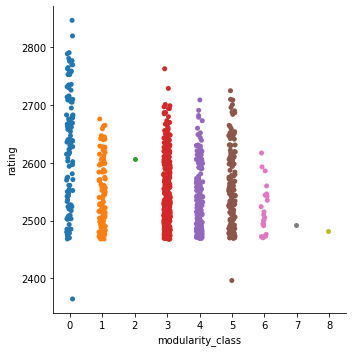

In [5]:
import seaborn as sns
sns.catplot(x="modularity_class", y="rating", data=df)

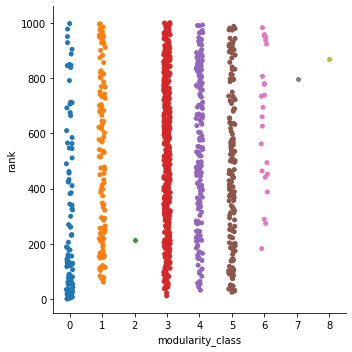

In [6]:
import seaborn as sns
sns.catplot(x="modularity_class", y="rank", data=df)

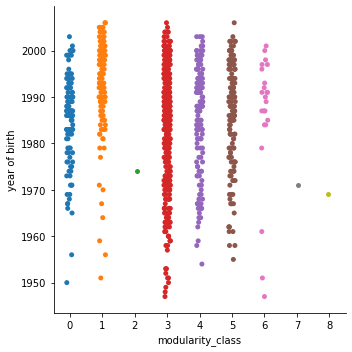

In [4]:
sns.catplot(x="modularity_class", y="year of birth", data=df)

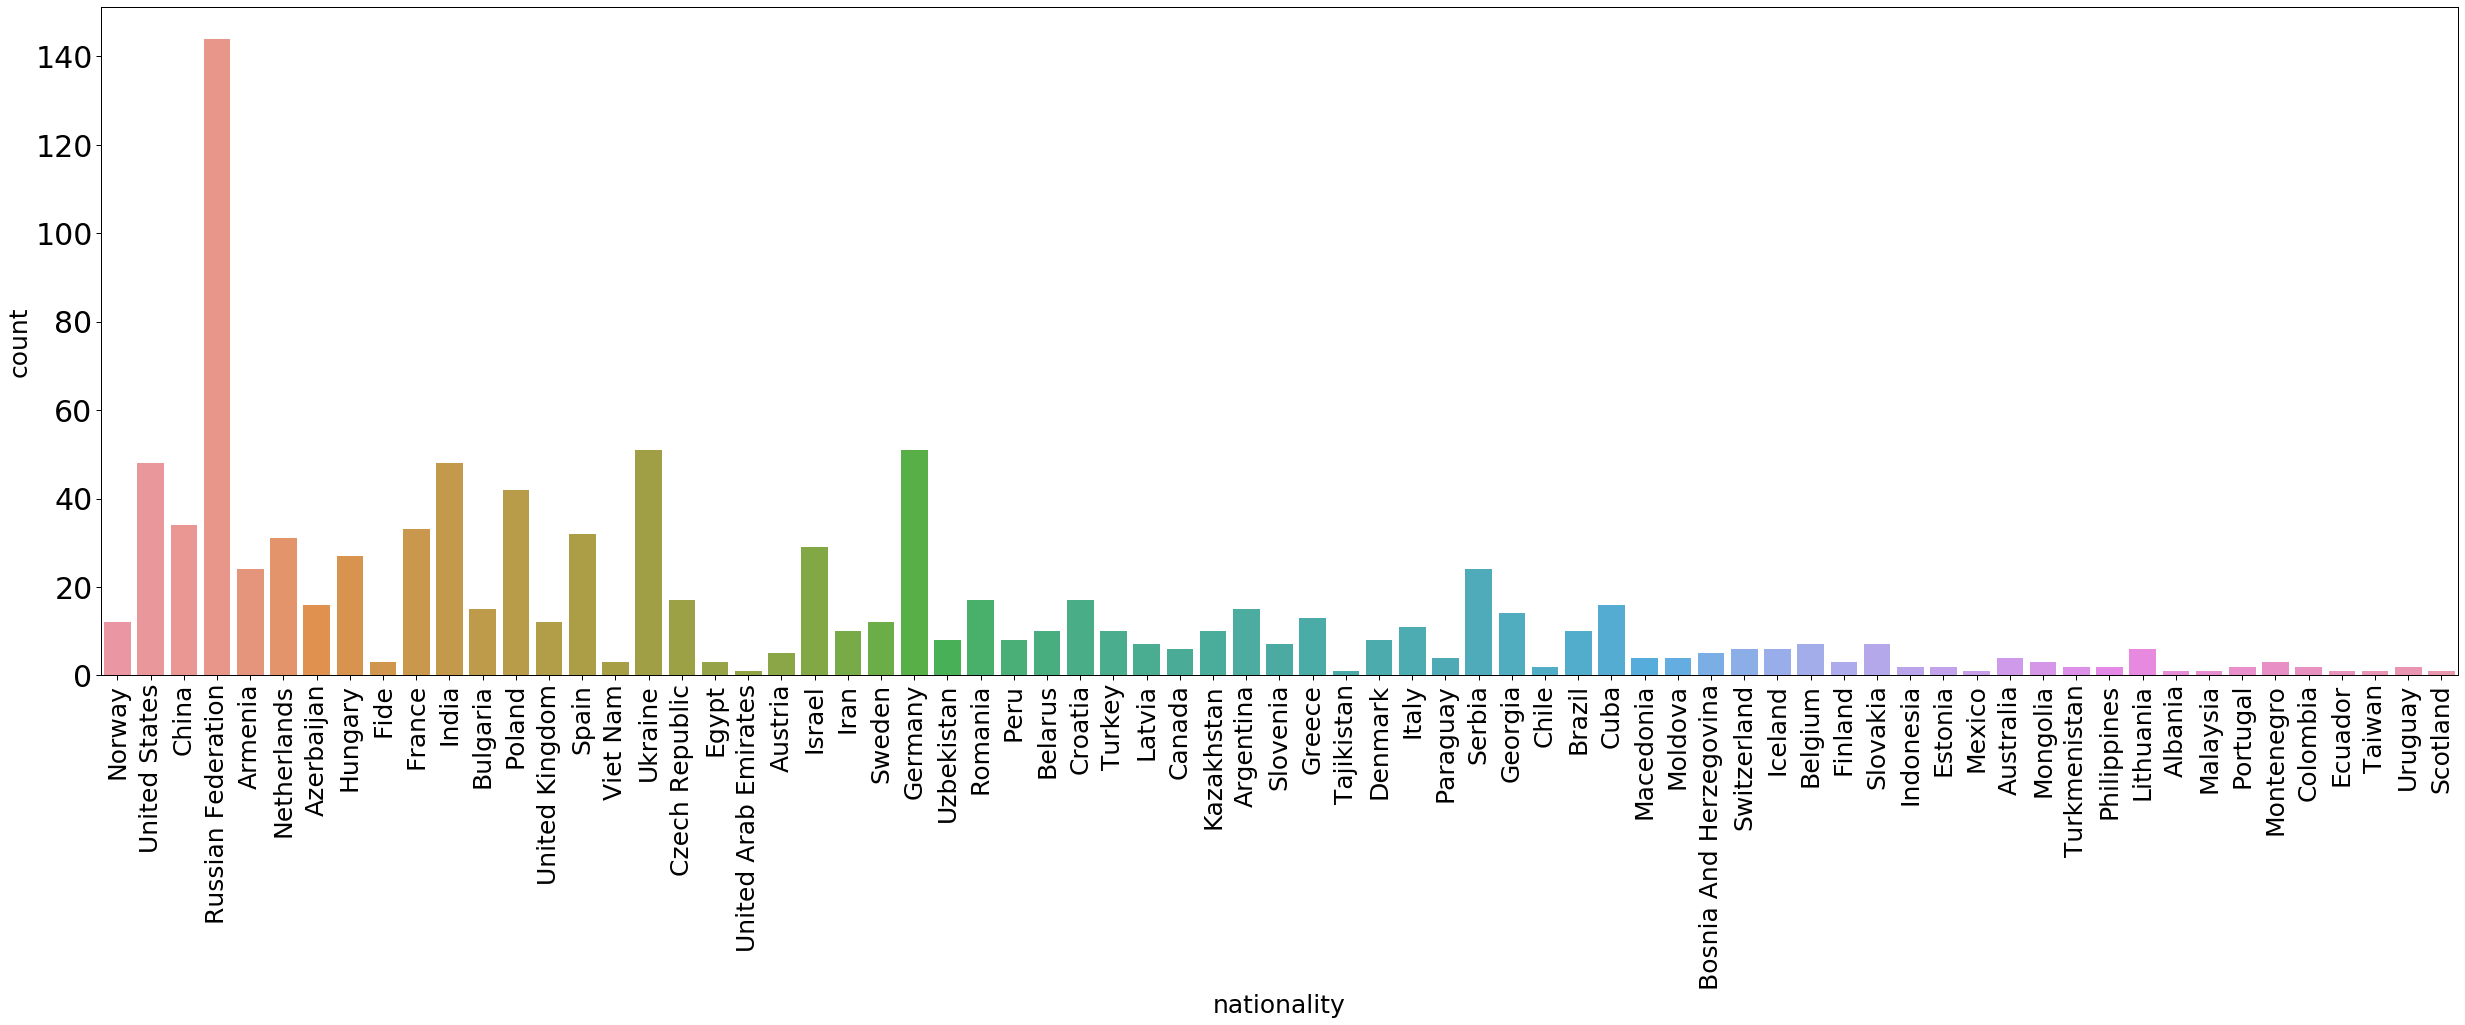

In [53]:
plt.rcParams.update({'font.size': 32})
plt.figure(figsize = (35,15))
sns.countplot(x="nationality", data=df)
plt.xticks(rotation=90)
plt.xticks(fontsize=25)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.savefig("countries.png", format="png", dpi=250)
plt.show()

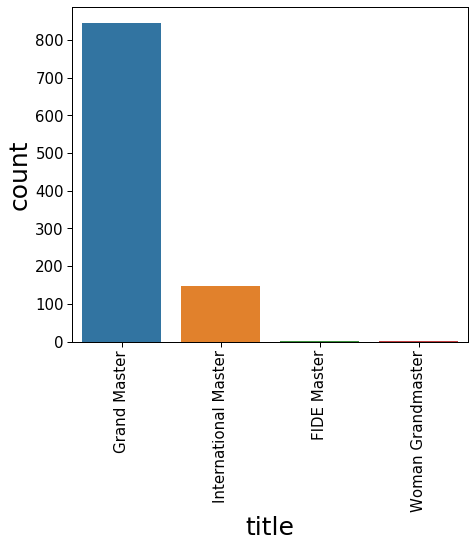

In [72]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize = (7,8))
sns.countplot(x="title", data=df[df["title"].str.contains('[A-Za-z]')])
plt.xticks(rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.savefig("titles.png", format="png", dpi=250)
plt.show()

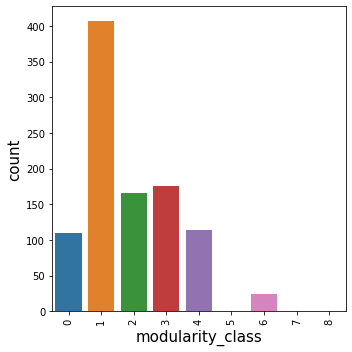

In [14]:
plt.rc('axes', labelsize=15)  
plt.figure(figsize = (5,5))
sns.countplot(x="modularity_class", data=df2)
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
#plt.savefig("rating range.png", format="png", dpi=250)
plt.show()

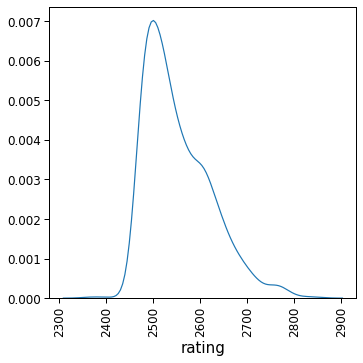

In [81]:
plt.rc('axes', labelsize=15)  
plt.rcParams.update({'font.size': 5})
plt.figure(figsize = (5,5))
sns.distplot(df["rating"],hist=False,norm_hist=False)
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("rating.png", format="png", dpi=250)
plt.show()

In [5]:
category = pd.cut(df.rating,bins=[2300,2400,2500,2600,2700,2800,2900],labels=['2300-2400','2400-2500','2500-2600','2600-2700','2700-2800','2800-2900'])
df.insert(5,'rating range',category)

In [6]:
category = pd.cut(df2.rating,bins=[2300,2400,2500,2600,2700,2800,2900],labels=['2300-2400','2400-2500','2500-2600','2600-2700','2700-2800','2800-2900'])
df2.insert(5,'rating range',category)

In [90]:
df

,Id,Label,timeset,rating,title,rating range,nationality,games,rank,fide id,year of birth,indegree,outdegree,Degree,modularity_class,weighted indegree,weighted outdegree,Weighted Degree,pageranks
0,Magnus Carlsen,NaN,NaN,2847,Grand Master,2800-2900,Norway,2835,1,1503014,1990,20,143,163,0,23,548,571,0.000345
1,Fabiano Caruana,NaN,NaN,2820,Grand Master,2800-2900,United States,2326,2,2020009,1992,50,142,192,0,120,248,368,0.000599
2,Liren Ding,NaN,NaN,2791,Grand Master,2700-2800,China,1507,3,8603677,1992,37,110,147,0,80,208,288,0.000366
3,Ian Nepomniachtchi,NaN,NaN,2789,Grand Master,2700-2800,Russian Federation,2081,4,4168119,1990,59,181,240,0,103,347,450,0.000754
4,Levon Aronian,NaN,NaN,2781,Grand Master,2700-2800,Armenia,3024,5,13300474,1982,41,145,186,0,97,297,394,0.000468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Vadim Malakhatko,NaN,NaN,2468,Grand Master,2400-2500,Belgium,1698,996,14104202,1977,39,23,62,1,46,23,69,0.000887
996,Alexander Bagrationi,NaN,NaN,2468,Grand Master,2400-2500,Israel,72,997,14104954,1990,5,0,5,0,7,0,7,0.000271
997,Tim Janzelj,NaN,NaN,2468,International Master,2400-2500,Slovenia,157,998,14607913,1994,8,2,10,3,8,2,10,0.000591
998,Ogulcan Kanmazalp,NaN,NaN,2468,International Master,2400-2500,Turkey,411,999,6304990,1992,49,18,67,3,55,18,73,0.001410


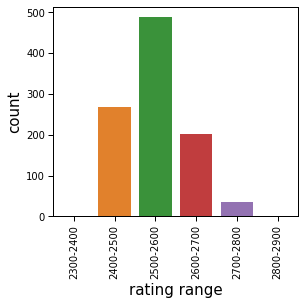

In [101]:
plt.rc('axes', labelsize=15)  
plt.figure(figsize = (5,5))
sns.countplot(x="rating range", data=df)
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
#plt.savefig("rating range.png", format="png", dpi=250)
plt.show()

In [42]:
df[df["nationality"]=="Fide"]

,Id,Label,timeset,rating,title,nationality,games,rank,fide id,year of birth,indegree,outdegree,Degree,modularity_class,weighted indegree,weighted outdegree,Weighted Degree,pageranks
12,Alireza Firouzja,NaN,NaN,2759,Grand Master,Fide,670,13,12573981,2003,80,93,173,0,112,129,241,0.001569
50,Igors Rausis,NaN,NaN,2685,International Master,Fide,1747,51,11600098,1961,10,17,27,3,12,17,29,0.000431
877,Arian Gonzalez Perez,NaN,NaN,2481,Grand Master,Fide,136,878,3507777,1988,11,5,16,4,11,5,16,0.000626


<Figure size 4320x2160 with 0 Axes>

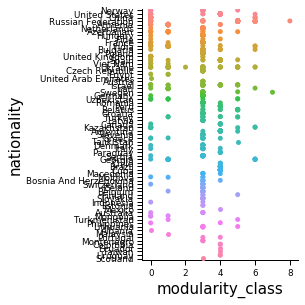

In [98]:
plt.figure(figsize = (60,30))
sns.catplot(x="modularity_class", y="nationality", data=df)
plt.tight_layout()
plt.show()

<Figure size 720x720 with 0 Axes>

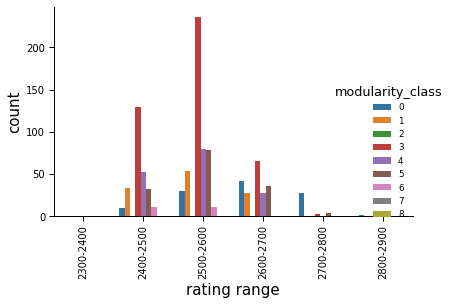

In [106]:

plt.rc('axes', labelsize=15)  
plt.figure(figsize = (10,10))
sns.catplot(x="rating range", kind="count", hue="modularity_class", data=df)
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
#plt.savefig("rating range.png", format="png", dpi=250)
plt.show()

<Figure size 720x720 with 0 Axes>

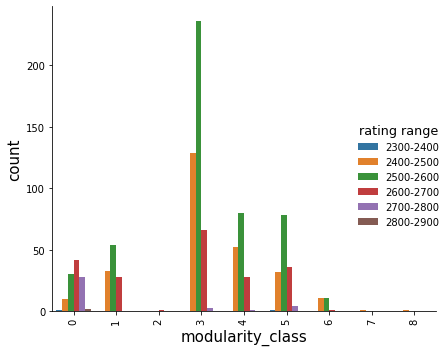

In [12]:
plt.rc('axes', labelsize=15)  
plt.figure(figsize = (10,10))
sns.catplot(x="modularity_class", kind="count", hue="rating range", data=df)
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
#plt.savefig("rating range.png", format="png", dpi=250)
plt.show()

<Figure size 720x720 with 0 Axes>

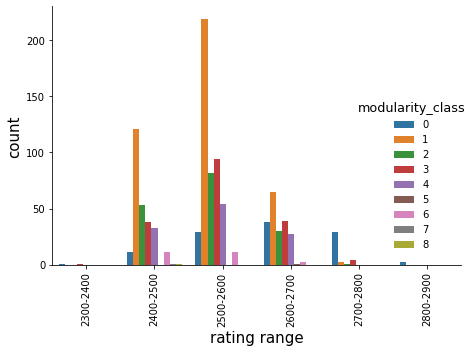

In [7]:

plt.rc('axes', labelsize=15)  
plt.figure(figsize = (10,10))
sns.catplot(x="rating range", kind="count", hue="modularity_class", data=df2)
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
#plt.savefig("rating range.png", format="png", dpi=250)
plt.show()

<Figure size 720x720 with 0 Axes>

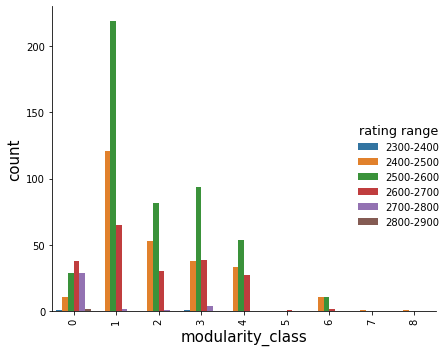

In [13]:
plt.rc('axes', labelsize=15)  
plt.figure(figsize = (10,10))
sns.catplot(x="modularity_class", kind="count", hue="rating range", data=df2)
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
#plt.savefig("rating range.png", format="png", dpi=250)
plt.show()

<Figure size 2880x1440 with 0 Axes>

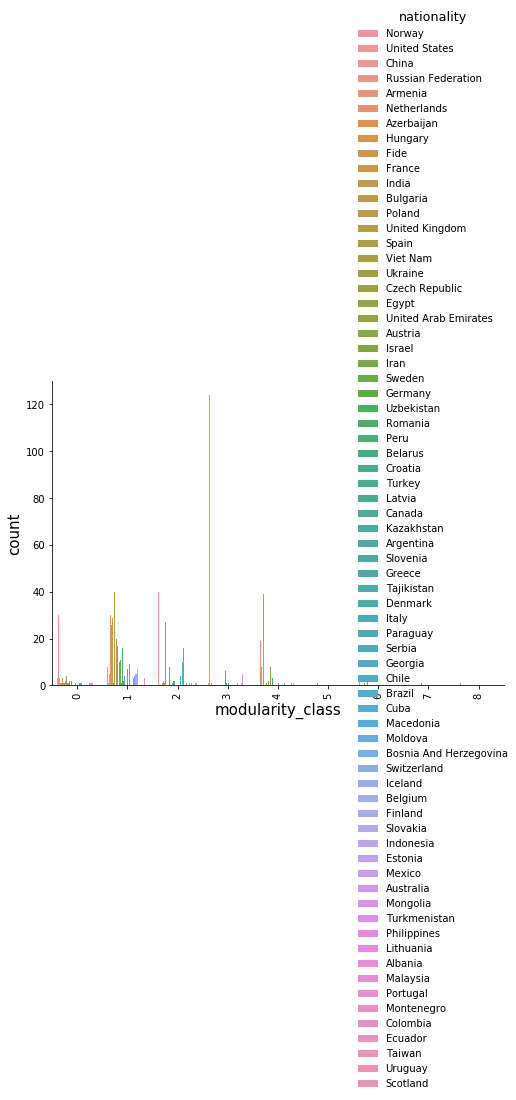

In [16]:
plt.rc('axes', labelsize=15)  
plt.figure(figsize = (40,20))
sns.catplot(x="modularity_class", kind="count", hue="nationality", data=df2)
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
#plt.savefig("rating range.png", format="png", dpi=250)
plt.show()

<Figure size 2880x1440 with 0 Axes>

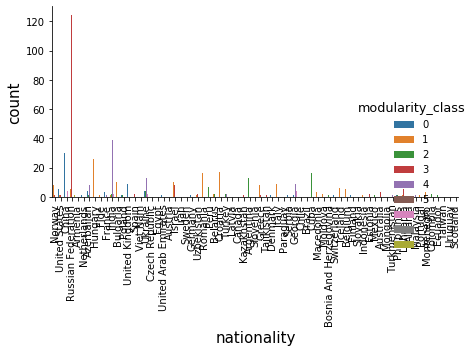

In [17]:
plt.rc('axes', labelsize=15)  
plt.figure(figsize = (40,20))
sns.catplot(x="nationality", kind="count", hue="modularity_class", data=df2)
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
#plt.savefig("rating range.png", format="png", dpi=250)
plt.show()

# Clustering

In [23]:
from networkx.algorithms import community

In [90]:
for i in range(0,12):
    print(nx.average_clustering(filter_edges(networks[i])))

0.0355330227335507
0.048210857970377455
0.0564872898029466
0.06722494284989379
0.07932373843365145
0.0878013350729264
0.09926455636450536
0.10642139003681159
0.10925432572002904
0.11646225682228262
0.1178280603729021
0.11786283320391891


ValueError: too many values to unpack (expected 2)

# Pagerank

In [7]:
df=pd.read_csv('Communities.csv')

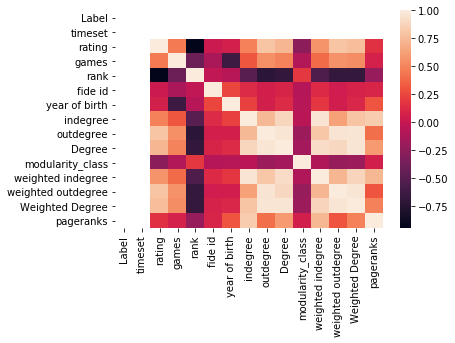

In [9]:
sns.heatmap(df.corr())

In [10]:
df.corr()

,Label,timeset,rating,games,rank,fide id,year of birth,indegree,outdegree,Degree,modularity_class,weighted indegree,weighted outdegree,Weighted Degree,pageranks
Label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timeset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,NaN,NaN,1.000000,0.455699,-0.943379,0.027713,0.067583,0.486515,0.797627,0.728182,-0.259569,0.571505,0.797277,0.766182,0.157928
games,NaN,NaN,0.455699,1.000000,-0.407517,-0.126034,-0.632541,0.311808,0.550839,0.493434,-0.091205,0.399700,0.564570,0.540668,0.075679
rank,NaN,NaN,-0.943379,-0.407517,1.000000,-0.021134,-0.063325,-0.502111,-0.721421,-0.682866,0.194622,-0.546045,-0.677604,-0.673921,-0.211278
fide id,NaN,NaN,0.027713,-0.126034,-0.021134,1.000000,0.253092,0.134297,0.060147,0.093048,-0.079326,0.124302,0.050619,0.081831,0.098257
year of birth,NaN,NaN,0.067583,-0.632541,-0.063325,0.253092,1.000000,0.220294,0.060993,0.127219,-0.068528,0.186165,0.054418,0.107779,0.308289
indegree,NaN,NaN,0.486515,0.311808,-0.502111,0.134297,0.220294,1.000000,0.744038,0.892657,-0.048619,0.960775,0.634109,0.800246,0.839068
outdegree,NaN,NaN,0.797627,0.550839,-0.721421,0.060147,0.060993,0.744038,1.000000,0.965325,-0.188978,0.812747,0.959743,0.969360,0.408588
Degree,NaN,NaN,0.728182,0.493434,-0.682866,0.093048,0.127219,0.892657,0.965325,1.000000,-0.146484,0.923683,0.895216,0.966616,0.603478


# Miscellaneous

In [79]:
G=filter_edges(networks[11])
for i in range(0,12):
    cycle=list(nx.find_cycle(filter_edges(networks[i]), orientation="original"))
    print(i)
    for edge in cycle:
        print(edge[0],edge[1],G.nodes[edge[0]]['rating'])

0
Ray Robson Jan H Timman 2673
Jan H Timman Zoltan Almasi 2533
Zoltan Almasi Anish Giri 2687
Anish Giri Bartlomiej Macieja 2776
Bartlomiej Macieja Mateusz Bartel 2519
Mateusz Bartel B Adhiban 2635
B Adhiban Sundar M Shyam 2659
Sundar M Shyam S.P. Sethuraman 2518
S.P. Sethuraman Pentala Harikrishna 2644
Pentala Harikrishna Wesley So 2730
Wesley So Ray Robson 2770
1
Fabiano Caruana Nikita Vitiugov 2820
Nikita Vitiugov Sergey Karjakin 2715
Sergey Karjakin Fabiano Caruana 2757
2
Magnus Carlsen Hikaru Nakamura 2847
Hikaru Nakamura Fabiano Caruana 2736
Fabiano Caruana Anish Giri 2820
Anish Giri Varuzhan Akobian 2776
Varuzhan Akobian Samuel Sevian 2614
Samuel Sevian Melikset Khachiyan 2660
Melikset Khachiyan Aleksandr Lenderman 2481
Aleksandr Lenderman Ray Robson 2624
Ray Robson Quang Liem Le 2673
Quang Liem Le Liren Ding 2709
Liren Ding Gata Kamsky 2791
Gata Kamsky Ian Nepomniachtchi 2665
Ian Nepomniachtchi Magnus Carlsen 2789
3
Liren Ding Gata Kamsky 2791
Gata Kamsky Anish Giri 2665
Anish G

In [42]:
topological=[]
for i in range(0,12):
    G = filter_edges(networks[i])
    print(i)
    topological.append(list(nx.topological_sort(G)))

0


NetworkXUnfeasible: Graph contains a cycle or graph changed during iteration

In [65]:
df=pd.read_csv('Communities.csv')
df

,Id,Label,timeset,rating,title,nationality,games,rank,fide id,year of birth,indegree,outdegree,Degree,modularity_class,weighted indegree,weighted outdegree,Weighted Degree,pageranks
0,Magnus Carlsen,NaN,NaN,2847,Grand Master,Norway,2835,1,1503014,1990,20,143,163,0,23,548,571,0.000345
1,Fabiano Caruana,NaN,NaN,2820,Grand Master,United States,2326,2,2020009,1992,50,142,192,0,120,248,368,0.000599
2,Liren Ding,NaN,NaN,2791,Grand Master,China,1507,3,8603677,1992,37,110,147,0,80,208,288,0.000366
3,Ian Nepomniachtchi,NaN,NaN,2789,Grand Master,Russian Federation,2081,4,4168119,1990,59,181,240,0,103,347,450,0.000754
4,Levon Aronian,NaN,NaN,2781,Grand Master,Armenia,3024,5,13300474,1982,41,145,186,0,97,297,394,0.000468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Vadim Malakhatko,NaN,NaN,2468,Grand Master,Belgium,1698,996,14104202,1977,39,23,62,1,46,23,69,0.000887
996,Alexander Bagrationi,NaN,NaN,2468,Grand Master,Israel,72,997,14104954,1990,5,0,5,0,7,0,7,0.000271
997,Tim Janzelj,NaN,NaN,2468,International Master,Slovenia,157,998,14607913,1994,8,2,10,3,8,2,10,0.000591
998,Ogulcan Kanmazalp,NaN,NaN,2468,International Master,Turkey,411,999,6304990,1992,49,18,67,3,55,18,73,0.001410


In [66]:
for player in topological[11]:
    print(player)

Tim Janzelj
Nikolaus Stanec
Werner Hug
Xavier Vila Gazquez
Yahli Sokolovsky
Robert Kuczynski
Zhonghan Ma
Vereslav S Eingorn
Vasil Spasov
Vyacheslav Ikonnikov
Zbigniew Pakleza
Joris Brenninkmeijer
Zhihang Xu
Rautela Saksham
Zoltan Ribli
Zong Yuan Zhao
Zhong Zhang
Yuri Yakovich
Zoltan Medvegy
Zurab Sturua
Yuri Solodovnichenko
Yago De Moura Santiago
Sebastian Iermito
Yusnel Bacallao Alonso
Zviad Izoria
Wojciech Moranda
Tomasz Warakomski
Zoltan Almasi
Zbynek Hracek
Vitali Golod
Zahar Efimenko
Wouter Spoelman
Vladimir Gurevich
Yevgeniy Roshka
Yuriy Kuzubov
Zhongyi Tan
Zhansaya Abdumalik
Yunguo Wan
Zaven Andriasian
Vugar Rasulov
Vugar Asadli
Yuriy Kryvoruchko
Yuri Vovk
Volodymyr Vetoshko
Yaroslav Zherebukh
Yuri Gonzalez Vidal
Yannick Pelletier
Raymond Song
Yannick Gozzoli
Yuniesky Quesada Perez
Walter Arencibia Rodriguez
Yasser Quesada Perez
William Hernandez Gonzalez
Yue Wang
Yiping Lou
Yi Xu
Yinglun Xu
Yifan Hou
Thies Heinemann
Yi Wei
Vladislav Nevednichy
Yan Liu
Zhamsaran Tsydypov
Volodar

In [75]:
G.out_edges('Tim Janzelj')

OutEdgeDataView([('Tim Janzelj', 'Jose Eduardo Martinez Alcantara'), ('Tim Janzelj', 'Marin Bosiocic'), ('Tim Janzelj', 'Noel Studer'), ('Tim Janzelj', 'Nikita Meshkovs'), ('Tim Janzelj', 'Gergely Aczel'), ('Tim Janzelj', 'Bence Korpa'), ('Tim Janzelj', 'Pier Luigi Basso'), ('Tim Janzelj', 'Jergus Pechac'), ('Tim Janzelj', 'Nikolaus Stanec'), ('Tim Janzelj', 'Matej Sebenik')])

AttributeError: 'DiGraph' object has no attribute 'nodes_with_selfloops'